In [ ]:
!pip install demoji
!pip install sastrawi
!pip install imbalanced-learn
!pip install scikit-learn
# !pip install scikit-plot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import re
import string
import demoji
import requests
import nltk
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
# import scikitplot as skplt
# from textblob import TextBlob
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('popular')
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve
# from sklearn.decomposition import TruncatedSVD
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzippin

![PM fix banget.png](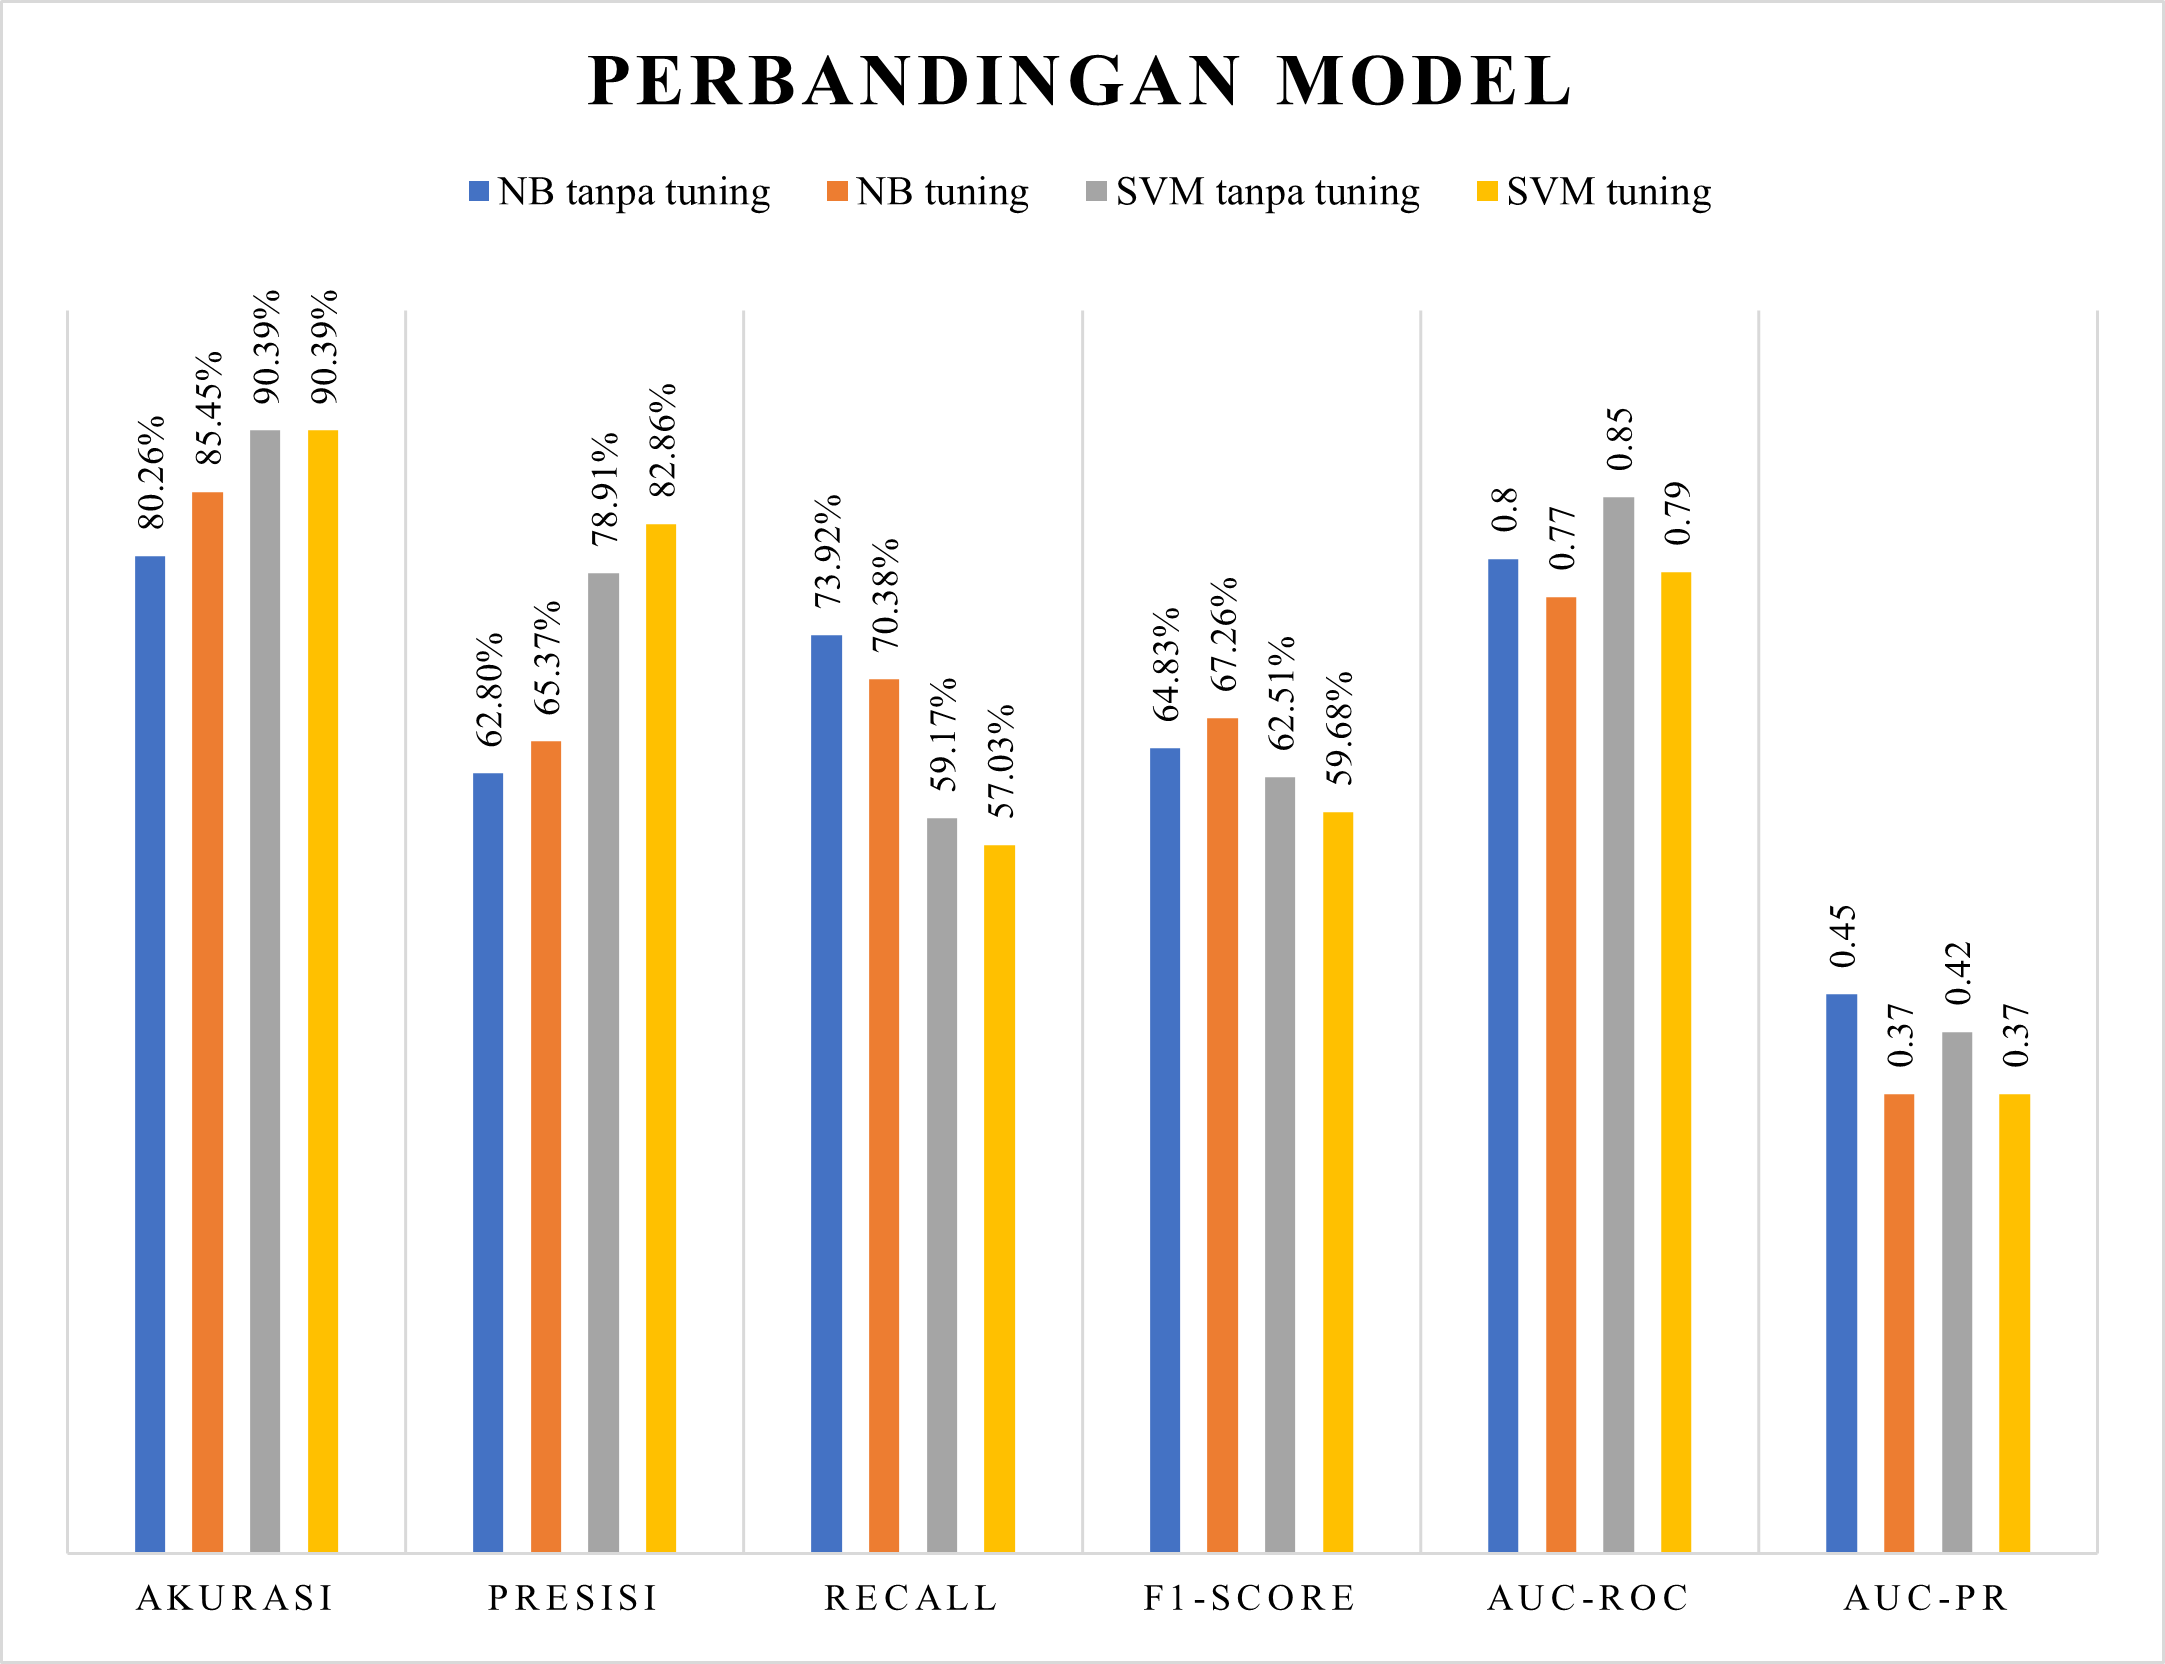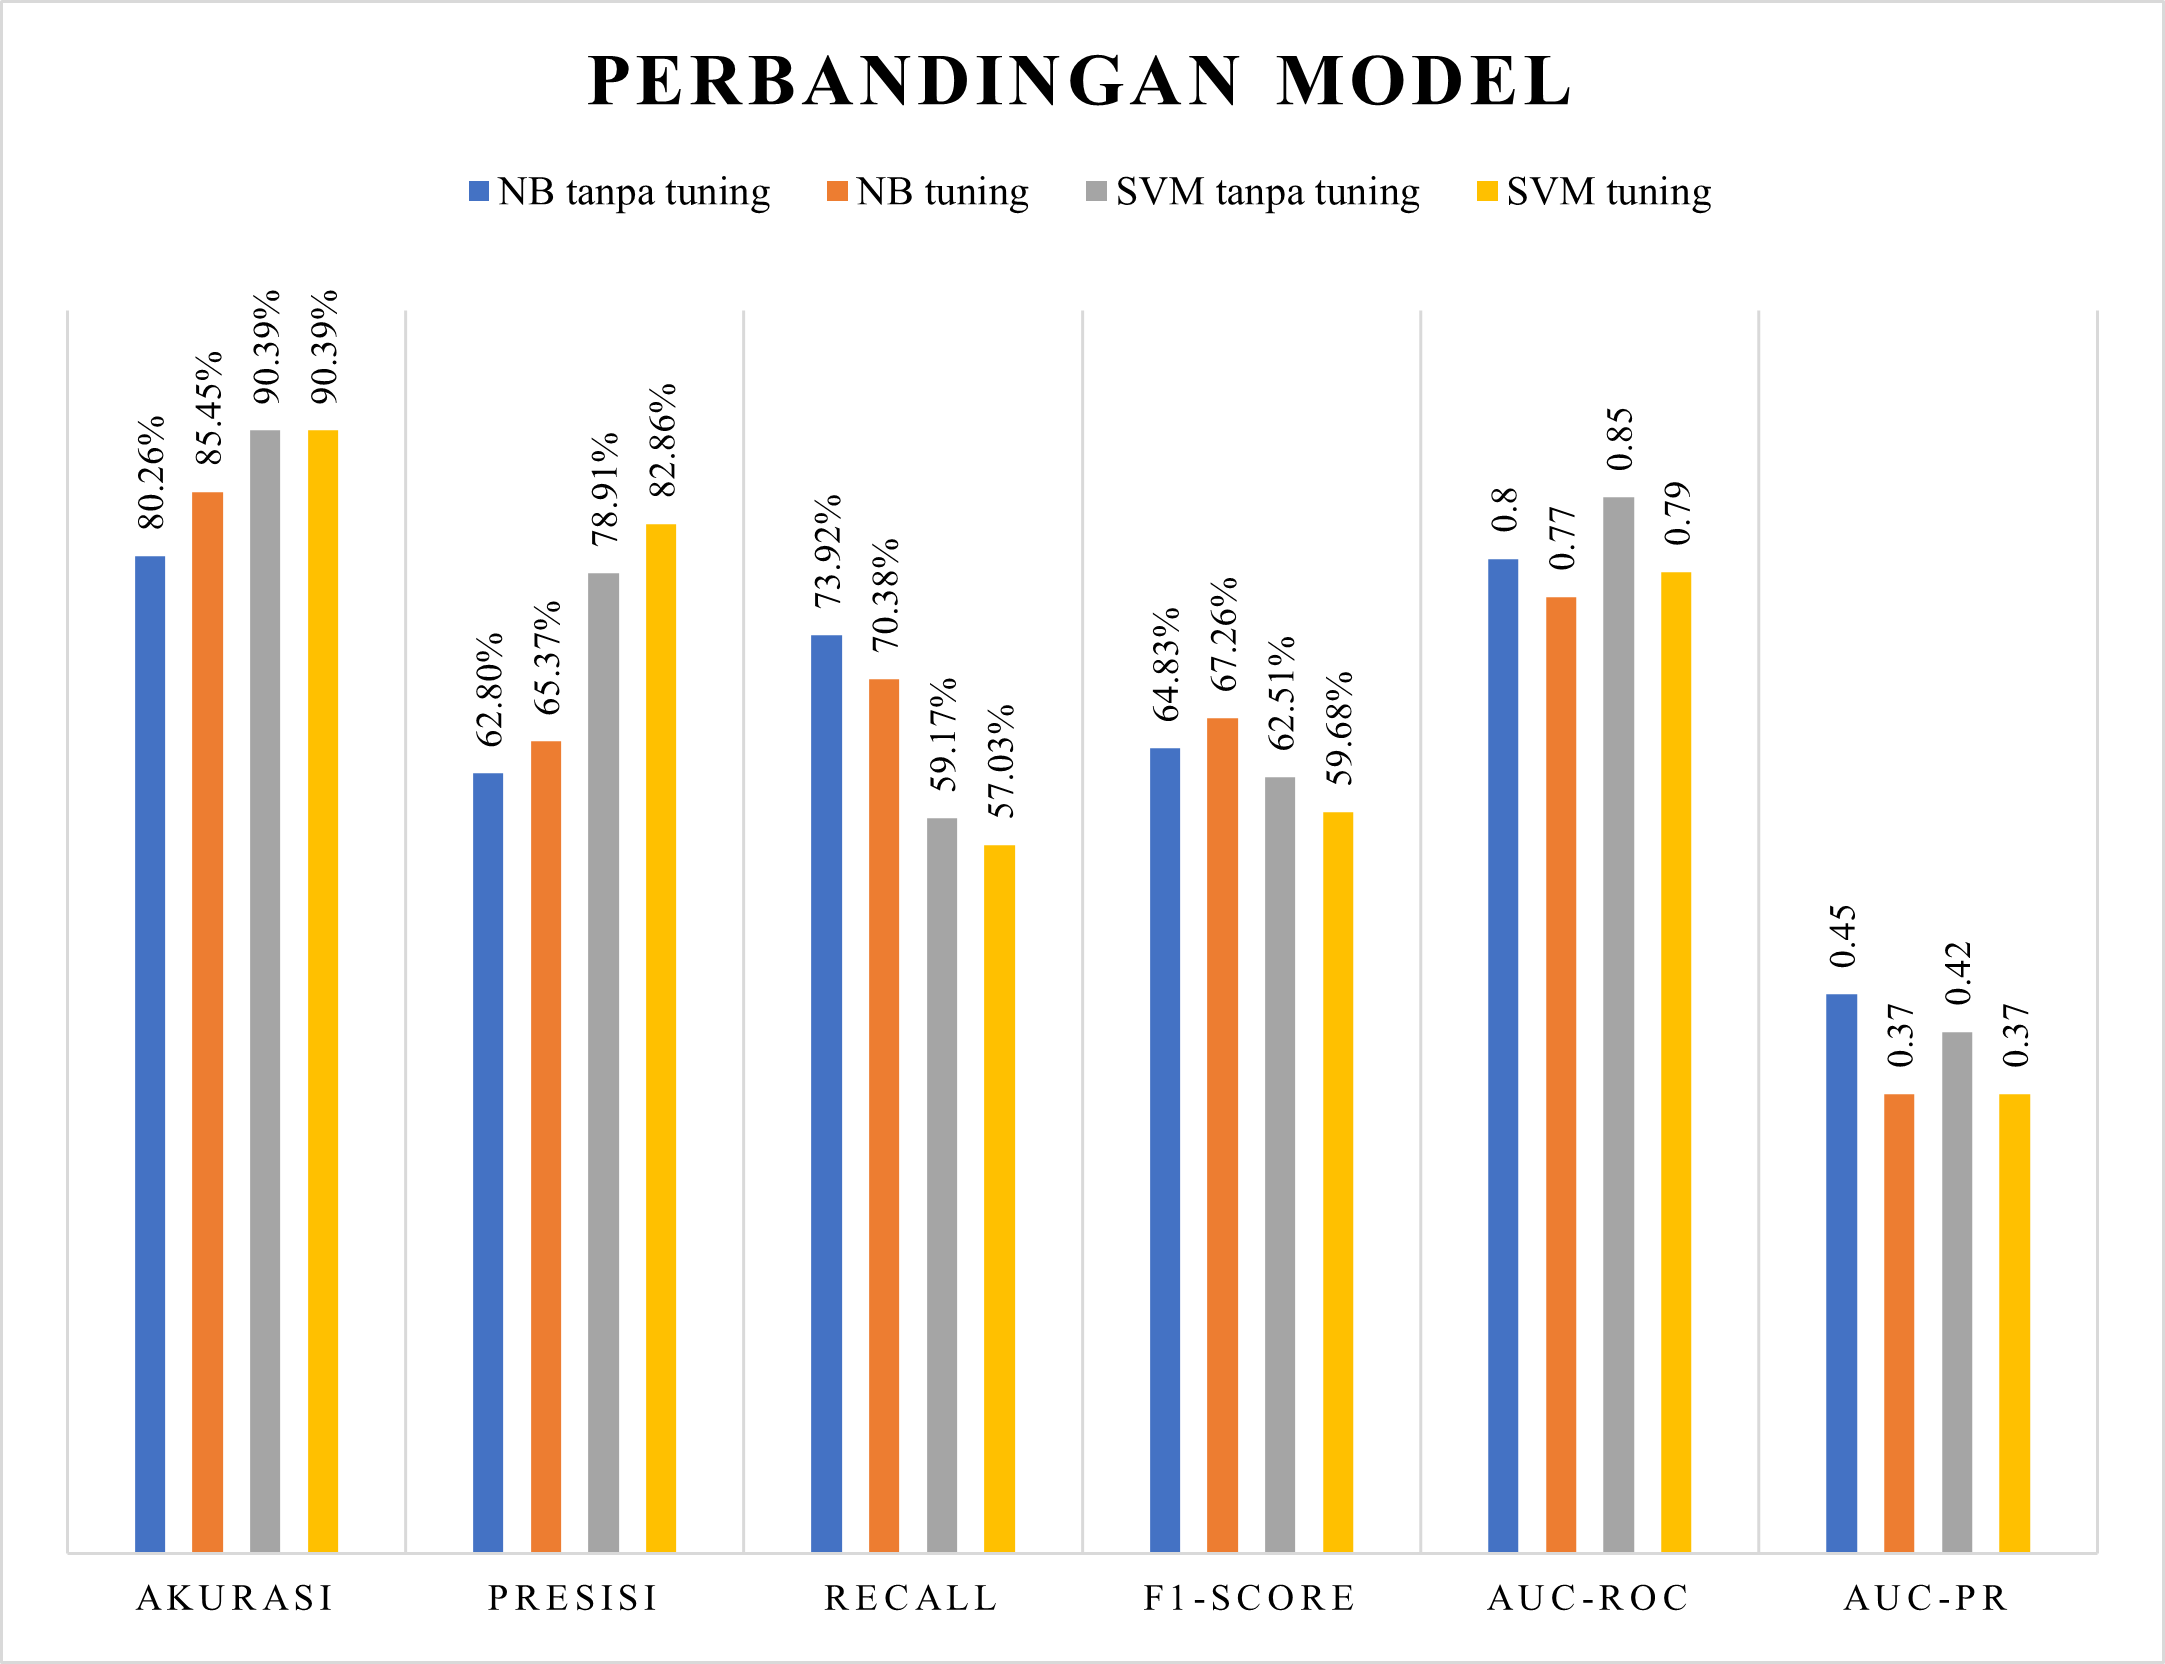)##**PENGUMPULAN DATA**

###**Scraping Data**

In [ ]:
# !pip install git+https://github.com/JustAnotherArchivist/snscrape.git

In [ ]:
# import snscrape.modules.twitter as sntwitter

In [ ]:
# # Creating list to append tweet data to
# tweets_list = []

# # Using TwitterSearchScraper to scrape data and append tweets to list
# for i,tweet in enumerate(sntwitter.TwitterSearchScraper('somasi since:2022-09-24 until:2022-09-30 lang:id').get_items()):
#   tweets_list.append([tweet.date, tweet.content, tweet.username])

In [ ]:
# # Creating a dataframe from the tweets list above
# tweets_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Text', 'Username'])

In [ ]:
# tweets_df.to_csv('somasi fix.csv', index = False)

In [ ]:
# data_scrape = pd.read_csv('somasi fix.csv')

In [ ]:
# data_scrape

###**Merge CSV**

In [ ]:
!gdown --id 18sRD5a6kFuh7-nlFn9XjSHrnvHvK96vr

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=18sRD5a6kFuh7-nlFn9XjSHrnvHvK96vr
To: /content/es teh indonesia fix.csv
100% 753k/753k [00:00<00:00, 123MB/s]


In [ ]:
!gdown --id 13gvBbWoVZUc11ap5B8SMLMnzoUXamT15

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=13gvBbWoVZUc11ap5B8SMLMnzoUXamT15
To: /content/somasi fix.csv
100% 1.71M/1.71M [00:00<00:00, 145MB/s]


In [ ]:
# Daftar file CSV yang ingin digabungkan
files = ['es teh indonesia fix.csv', 'somasi fix.csv']

# Membaca file-file CSV dan menyimpannya dalam DataFrame
combine_data = []
for file in files:
    two_data = pd.read_csv(file)
    combine_data.append(two_data)

# Menggabungkan DataFrame menjadi satu DataFrame tunggal
merged_data = pd.concat(combine_data)

# Menyimpan DataFrame hasil penggabungan menjadi file CSV baru
merged_data.to_csv('full data.csv', index=False)

###**Convert Column Sentiment and Remove 2 Column**

In [ ]:
convert_data = pd.read_csv('full data.csv')

In [ ]:
convert_data['Sentiment'].value_counts()

0.0    1733
1.0     261
Name: Sentiment, dtype: int64

In [ ]:
convert_data['Sentiment'] = convert_data['Sentiment'].replace({1.0: 'positif', 0.0: 'negatif'})

In [ ]:
convert_data['Sentiment'].value_counts()

negatif    1733
positif     261
Name: Sentiment, dtype: int64

In [ ]:
convert_data.drop(['Datetime', 'Username'], axis=1, inplace=True)

In [ ]:
convert_data.to_csv('convert.csv')

##**PRE-PROCESSING**

###**Cleansing**

####Remove Missing Value



In [ ]:
data_full = convert_data
# Informasi dimensi data (baris, kolom)
data_full.shape

(13689, 2)

In [ ]:
data_full.isnull().sum()

Text             0
Sentiment    11695
dtype: int64

In [ ]:
rm_missing_value = data_full.dropna()
rm_missing_value.shape

(1994, 2)

####Remove Duplicate

In [ ]:
rm_missing_value.duplicated().sum()

69

In [ ]:
# Tidak menghasilkan dataframe baru, sehingga yang dimodifikasi adalah rm_mising_value
rm_missing_value.drop_duplicates(inplace=True)

<ipython-input-23-480723c3f3a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rm_missing_value.drop_duplicates(inplace=True)


In [ ]:
rm_duplicate = rm_missing_value

In [ ]:
rm_duplicate.shape

(1925, 2)

In [ ]:
rm_duplicate.to_csv('data rm dup & miss value.csv', index=False)

####Remove Tweet Username

In [ ]:
clean_text = pd.read_csv('data rm dup & miss value.csv')

In [ ]:
# Menghapus username
clean_text['Cleansing'] = clean_text['Text'].apply(lambda x: re.sub(r'@\w+', '', x))

####Remove Hashtag

In [ ]:
# Menghapus hashtag
clean_text['Cleansing'] = clean_text['Cleansing'].apply(lambda x: re.sub(r'#\w+', '', x))

####Remove Number

In [ ]:
# Menghapus angka
clean_text['Cleansing'] = clean_text['Cleansing'].apply(lambda x: re.sub(r'\d', '', x))

####Remove URL

In [ ]:
# Menghapus url
clean_text['Cleansing'] = clean_text['Cleansing'].apply(lambda x: re.sub(r'http\S+|www\S+', '', x))

####Remove Emoji

In [ ]:
# Mengunduh atau memperbarui kode-kode emoji yang digunakan oleh pustaka demoji
demoji.download_codes()

<ipython-input-32-9a6601d46148>:2: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [ ]:
# Menghapus emoji
clean_text['Cleansing'] = clean_text['Cleansing'].apply(lambda x: demoji.replace(x, ''))

####Remove Non-ASCII

In [ ]:
# Menghapus karakter non-ASCII
clean_text['Cleansing'] = clean_text['Cleansing'].apply(lambda x: re.sub(r'[^\x00-\x7F]', ' ', x))

####Remove Repetition

In [ ]:
# Menghapus huruf berulang yang muncul tiga kali atau lebih secara berurutan --> makannnnnnn
clean_text['Cleansing'] = clean_text['Cleansing'].apply(lambda x: re.sub(r'(\w)\1{2,}', r'\1', x))

####Remove Punctuation

In [ ]:
# Mengganti simbol &amp menjadi string kosong
clean_text['Cleansing'] = clean_text['Cleansing'].apply(lambda x: re.sub(r'&amp;', '', x))

In [ ]:
# Menambahkan spasi setelah tanda baca
clean_text['Cleansing'] = clean_text['Cleansing'].apply(lambda x: re.sub(r'([.,!?;:/-])', r'\1 ', x))

In [ ]:
# Mendefinisikan tabel translator untuk menghapus tanda baca
translator = str.maketrans('', '', string.punctuation)

In [ ]:
# Menghapus tanda baca
clean_text['Cleansing'] = clean_text['Cleansing'].str.translate(translator)

In [ ]:
# Menghapus tanda baca yang belum terhapus menggunakan translator
other_punctuation = r'[,.!?;:"‘’“”‟”″‶()]'
clean_text['Cleansing'] = clean_text['Cleansing'].apply(lambda x: re.sub(other_punctuation, '', x))

In [ ]:
clean_text.head()

,Text,Sentiment,Cleansing
0,@marthaindah_ @ohmybeautybank Es teh indonesia...,negatif,Es teh indonesia seember biar skalian diabet...
1,"es teh indonesia salah, tp yang kritik kemaren...",positif,es teh indonesia salah tp yang kritik kemaren...
2,Krn pnasaran semanis ap es teh Indonesia smpe ...,negatif,Krn pnasaran semanis ap es teh Indonesia smpe ...
3,Di kompleks sebelah ada kedai es teh Indonesia...,negatif,Di kompleks sebelah ada kedai es teh Indonesia...
4,@esteh_indonesia Barusan beli es teh indonesia...,negatif,Barusan beli es teh indonesia Udah ditulis l...


###**Case Folding**

In [ ]:
clean_text['Case Folding'] = clean_text['Cleansing'].str.lower()

In [ ]:
case_folding = clean_text

In [ ]:
case_folding.head()

,Text,Sentiment,Cleansing,Case Folding
0,@marthaindah_ @ohmybeautybank Es teh indonesia...,negatif,Es teh indonesia seember biar skalian diabet...,es teh indonesia seember biar skalian diabet...
1,"es teh indonesia salah, tp yang kritik kemaren...",positif,es teh indonesia salah tp yang kritik kemaren...,es teh indonesia salah tp yang kritik kemaren...
2,Krn pnasaran semanis ap es teh Indonesia smpe ...,negatif,Krn pnasaran semanis ap es teh Indonesia smpe ...,krn pnasaran semanis ap es teh indonesia smpe ...
3,Di kompleks sebelah ada kedai es teh Indonesia...,negatif,Di kompleks sebelah ada kedai es teh Indonesia...,di kompleks sebelah ada kedai es teh indonesia...
4,@esteh_indonesia Barusan beli es teh indonesia...,negatif,Barusan beli es teh indonesia Udah ditulis l...,barusan beli es teh indonesia udah ditulis l...


###**Normalization**

In [ ]:
# Membaca file dari url github
url = 'https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv'
github_data = pd.read_csv(url)

In [ ]:
# Mengganti header
github_data.rename(columns={'singkat': 'singkatan', 'hasil': 'baku'}, inplace=True)

In [ ]:
# Membuat kamus yang memetakan singkatan ke bentuk baku pada github data
abbreviations_github = dict(zip(github_data['singkatan'], github_data['baku']))

In [ ]:
# Download data dari google drive
!gdown 1-tZUGVbNgVh5P_P-LWwhZKsBoQSnkrXz

Downloading...
From: https://drive.google.com/uc?id=1-tZUGVbNgVh5P_P-LWwhZKsBoQSnkrXz
To: /content/kamus fix 2.csv
100% 63.7k/63.7k [00:00<00:00, 63.3MB/s]


In [ ]:
personal_dict = pd.read_csv('kamus fix 2.csv')

In [ ]:
# Membuat kamus yang memetakan singkatan ke bentuk baku pada data personal
abbreviations_personal = dict(zip(personal_dict['singkatan'], personal_dict['baku']))

In [ ]:
def normalize_text_with_priority(text):
    tokens = text.split()
    normalized_tokens = []
    for token in tokens:
        if token in abbreviations_personal:
            normalized_tokens.append(abbreviations_personal[token])
        elif token in abbreviations_github:
            normalized_tokens.append(abbreviations_github[token])
        else:
            normalized_tokens.append(token)
    return ' '.join(normalized_tokens)

In [ ]:
case_folding['Normalization'] = case_folding['Case Folding'].apply(normalize_text_with_priority)

In [ ]:
normalization = case_folding

In [ ]:
normalization.head()

,Text,Sentiment,Cleansing,Case Folding,Normalization
0,@marthaindah_ @ohmybeautybank Es teh indonesia...,negatif,Es teh indonesia seember biar skalian diabet...,es teh indonesia seember biar skalian diabet...,es teh indonesia seember biar sekalian diabete...
1,"es teh indonesia salah, tp yang kritik kemaren...",positif,es teh indonesia salah tp yang kritik kemaren...,es teh indonesia salah tp yang kritik kemaren...,es teh indonesia salah tetapi yang kritik kema...
2,Krn pnasaran semanis ap es teh Indonesia smpe ...,negatif,Krn pnasaran semanis ap es teh Indonesia smpe ...,krn pnasaran semanis ap es teh indonesia smpe ...,karena penasaran manis apa es teh indonesia sa...
3,Di kompleks sebelah ada kedai es teh Indonesia...,negatif,Di kompleks sebelah ada kedai es teh Indonesia...,di kompleks sebelah ada kedai es teh indonesia...,di kompleks sebelah ada kedai es teh indonesia...
4,@esteh_indonesia Barusan beli es teh indonesia...,negatif,Barusan beli es teh indonesia Udah ditulis l...,barusan beli es teh indonesia udah ditulis l...,baru saja beli es teh indonesia sudah ditulis ...


###**Tokenizing**

In [ ]:
normalization['Tokenizing'] = normalization['Normalization'].apply(word_tokenize)

In [ ]:
tokenizing = normalization

In [ ]:
tokenizing.head()

,Text,Sentiment,Cleansing,Case Folding,Normalization,Tokenizing
0,@marthaindah_ @ohmybeautybank Es teh indonesia...,negatif,Es teh indonesia seember biar skalian diabet...,es teh indonesia seember biar skalian diabet...,es teh indonesia seember biar sekalian diabete...,"[es, teh, indonesia, seember, biar, sekalian, ..."
1,"es teh indonesia salah, tp yang kritik kemaren...",positif,es teh indonesia salah tp yang kritik kemaren...,es teh indonesia salah tp yang kritik kemaren...,es teh indonesia salah tetapi yang kritik kema...,"[es, teh, indonesia, salah, tetapi, yang, krit..."
2,Krn pnasaran semanis ap es teh Indonesia smpe ...,negatif,Krn pnasaran semanis ap es teh Indonesia smpe ...,krn pnasaran semanis ap es teh indonesia smpe ...,karena penasaran manis apa es teh indonesia sa...,"[karena, penasaran, manis, apa, es, teh, indon..."
3,Di kompleks sebelah ada kedai es teh Indonesia...,negatif,Di kompleks sebelah ada kedai es teh Indonesia...,di kompleks sebelah ada kedai es teh indonesia...,di kompleks sebelah ada kedai es teh indonesia...,"[di, kompleks, sebelah, ada, kedai, es, teh, i..."
4,@esteh_indonesia Barusan beli es teh indonesia...,negatif,Barusan beli es teh indonesia Udah ditulis l...,barusan beli es teh indonesia udah ditulis l...,baru saja beli es teh indonesia sudah ditulis ...,"[baru, saja, beli, es, teh, indonesia, sudah, ..."


###**Stopword**

In [ ]:
additional_stopword = [ 'eiits', 'wkqkqkqkq', 'wkakakakak', 'an', 'wkwk', 'wkw', 'wkwkwkwk', 'wkwkk', 'x','wkwkwkwkw',
                      'wkkwk', 'wk', 'wkwkwk', 'wkwkwkw', 'wkwkw', 'um', 'hahahaha', 'haha', 'gerngitel', 'hehe', 'hahaha',
                      'p', 'e', 'nya', 'nge', 'wkwwkwkw', 'wkk', 'ue', 'hehehe', 'hahhaa', 'hehhew', 'hiks', 'wkwkwkwkk',
                      'wkwkkwkwkwkkwk', 'wkwkwkwkwk', 'huhuhu', 'wkwkkw', 'wkwkwkwkwkwkw', 'kwkwjsks', 'blblablabla', 'hahay',
                      'wkwksksk', 'bla', 'i', 'kwkwkwwkwkwkkwkwkkw', 'tralalalaa', 'ckck', 'wkkwkskskw', 'hhaha', 'wkwkwkk',
                      'z', 'kwkwkwkw', 'wkkwwk', 'cc', 'xixi', 'k', 'hahahahahaha', 'heu', 'wkwkwwk', 'jdhsjdh', 'hhe',
                      'wkwkwkwmmwm', 'hihihi', 'wakakakak', 'wkaokwaokwoa', 'wkwwkwkkwkwkes', 'kwkwkw', 'kwkw', 'akwkwkwkkwwk',
                      'wkwkwkwkwkwk', 'bo', 'awikwok', 'h', 'hehehehehehe', 'wkkwkw', 'kwkwkwkwkwkwkwkwkw', 'bhuakakak',
                      'wkwkkwwkw', 'adudududuu', 'huhu', 'awkwkkwkwk', 'ehehehe', 'ekwk','ataah', 'in', 'wkwkwkwwk', 'the',
                      'of', 'hahahahaa', 'ckckckck', 'awoakowak', 'heheh', 'aokwwk', 'hahahah', 'hilih', 'hilihh', 'heuhh',
                      'wgwgwgwg', 'skwkwkkw', 'wokwokwok', 'ahahaha', 'meng', 'wksksksks', 'cu', 'wkwkkwkwkw', 'kwkwkwwkwk',
                      'hahahahahahahahahahaha', 'wkakakak', 'aowkwowkwowk', 'ckckck', 'wkkwkwkw', 'yahaha', 'wqwq', 'l',
                      'ny', 'hahaha', 'hhaha', 'hahahaha', 'hahahah', 'haha', 'auch', 'kwkwk', 'di', 'e', 'men', 'nge',
                      'in', 'z', 'wkwkkwwk', 'ber', 'wkwkwkkwk', 'xd', 'wu', 'nyaa', 'huuu', 'hm', 'hadeh', 'haduh', 'dih',
                      'beuhh', 'beuh', 'tel', 'ter', 'tan', 'pin', 'is', 'it', 'be', 'uhh', 't', 'b', 'bb', 'ya', 'yah',
                      'iya', 'deh', 'sih', 'ah', 'ais', 'ai', 'cih', 'cie', 'mah', 'eh', 'dah', 'elah', 'gih', 'hah', 'halah',
                      'hayo', 'heh', 'hik', 'idih', 'ih', 'oalah', 'oh', 'tuh', 'uh', 'walah', 'weh', 'nih', 'loh', 'lho']

In [ ]:
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('indonesian')).union(additional_stopword) # gabung stopword nltk dan additional stopword
    filtered_tokens = [token for token in tokens if token.casefold() not in stop_words]
    return filtered_tokens

In [ ]:
tokenizing['Stopword'] = tokenizing['Tokenizing'].apply(remove_stopwords)

In [ ]:
stopword = tokenizing

In [ ]:
stopword.head()

,Text,Sentiment,Cleansing,Case Folding,Normalization,Tokenizing,Stopword
0,@marthaindah_ @ohmybeautybank Es teh indonesia...,negatif,Es teh indonesia seember biar skalian diabet...,es teh indonesia seember biar skalian diabet...,es teh indonesia seember biar sekalian diabete...,"[es, teh, indonesia, seember, biar, sekalian, ...","[es, teh, indonesia, seember, biar, diabetes]"
1,"es teh indonesia salah, tp yang kritik kemaren...",positif,es teh indonesia salah tp yang kritik kemaren...,es teh indonesia salah tp yang kritik kemaren...,es teh indonesia salah tetapi yang kritik kema...,"[es, teh, indonesia, salah, tetapi, yang, krit...","[es, teh, indonesia, salah, kritik, kemarin, s..."
2,Krn pnasaran semanis ap es teh Indonesia smpe ...,negatif,Krn pnasaran semanis ap es teh Indonesia smpe ...,krn pnasaran semanis ap es teh indonesia smpe ...,karena penasaran manis apa es teh indonesia sa...,"[karena, penasaran, manis, apa, es, teh, indon...","[penasaran, manis, es, teh, indonesia, viral, ..."
3,Di kompleks sebelah ada kedai es teh Indonesia...,negatif,Di kompleks sebelah ada kedai es teh Indonesia...,di kompleks sebelah ada kedai es teh indonesia...,di kompleks sebelah ada kedai es teh indonesia...,"[di, kompleks, sebelah, ada, kedai, es, teh, i...","[kompleks, sebelah, kedai, es, teh, indonesia,..."
4,@esteh_indonesia Barusan beli es teh indonesia...,negatif,Barusan beli es teh indonesia Udah ditulis l...,barusan beli es teh indonesia udah ditulis l...,baru saja beli es teh indonesia sudah ditulis ...,"[baru, saja, beli, es, teh, indonesia, sudah, ...","[beli, es, teh, indonesia, ditulis, gula, mani..."


###**Stemming**

In [ ]:
# Membuat stemmer menggunakan sastrawi
stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()

In [ ]:
def stem_text(text):
    # Melakukan stemming
    stemmed_tokens = [stemmer.stem(token) for token in text]

    # Menggabungkan token menjadi kalimat kembali
    full_text = ' '.join(stemmed_tokens)

    return full_text

In [ ]:
stopword['Stemming'] = stopword['Stopword'].apply(stem_text)

In [ ]:
stemming = stopword

In [ ]:
stemming.head()

,Text,Sentiment,Cleansing,Case Folding,Normalization,Tokenizing,Stopword,Stemming
0,@marthaindah_ @ohmybeautybank Es teh indonesia...,negatif,Es teh indonesia seember biar skalian diabet...,es teh indonesia seember biar skalian diabet...,es teh indonesia seember biar sekalian diabete...,"[es, teh, indonesia, seember, biar, sekalian, ...","[es, teh, indonesia, seember, biar, diabetes]",es teh indonesia ember biar diabetes
1,"es teh indonesia salah, tp yang kritik kemaren...",positif,es teh indonesia salah tp yang kritik kemaren...,es teh indonesia salah tp yang kritik kemaren...,es teh indonesia salah tetapi yang kritik kema...,"[es, teh, indonesia, salah, tetapi, yang, krit...","[es, teh, indonesia, salah, kritik, kemarin, s...",es teh indonesia salah kritik kemarin salah kr...
2,Krn pnasaran semanis ap es teh Indonesia smpe ...,negatif,Krn pnasaran semanis ap es teh Indonesia smpe ...,krn pnasaran semanis ap es teh indonesia smpe ...,karena penasaran manis apa es teh indonesia sa...,"[karena, penasaran, manis, apa, es, teh, indon...","[penasaran, manis, es, teh, indonesia, viral, ...",penasaran manis es teh indonesia viral somasi ...
3,Di kompleks sebelah ada kedai es teh Indonesia...,negatif,Di kompleks sebelah ada kedai es teh Indonesia...,di kompleks sebelah ada kedai es teh indonesia...,di kompleks sebelah ada kedai es teh indonesia...,"[di, kompleks, sebelah, ada, kedai, es, teh, i...","[kompleks, sebelah, kedai, es, teh, indonesia,...",kompleks belah kedai es teh indonesia buka nia...
4,@esteh_indonesia Barusan beli es teh indonesia...,negatif,Barusan beli es teh indonesia Udah ditulis l...,barusan beli es teh indonesia udah ditulis l...,baru saja beli es teh indonesia sudah ditulis ...,"[baru, saja, beli, es, teh, indonesia, sudah, ...","[beli, es, teh, indonesia, ditulis, gula, mani...",beli es teh indonesia tulis gula manis banget ...


In [ ]:
stemming.to_csv('After Pre-Processing.csv')

##**TF-IDF**

In [ ]:
after_process = stemming['Stemming']

In [ ]:
after_process

0                    es teh indonesia ember biar diabetes
1       es teh indonesia salah kritik kemarin salah kr...
2       penasaran manis es teh indonesia viral somasi ...
3       kompleks belah kedai es teh indonesia buka nia...
4       beli es teh indonesia tulis gula manis banget ...
                              ...                        
1920    sampah twitter ujung somasi capek hubung masya...
1921    aneh somasi beli rasa wajar komentar hiperboli...
1922    es teh main new york somasi main new york huku...
1923                                    somasi kena batal
1924    fix somasi siap tim tangan blunder biar kaget ...
Name: Stemming, Length: 1925, dtype: object

In [ ]:
# TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Menghitung TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(after_process)

# Konversi TF-IDF matrix ke DataFrame (opsional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [ ]:
tfidf_df.head()

,aan,abai,abal,abang,abdul,absolut,absurd,acak,acara,acu,...,woi,wow,wujud,xing,yakin,york,yos,yotta,youtube,zaman
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tfidf_df.to_csv('tf-idf.csv')

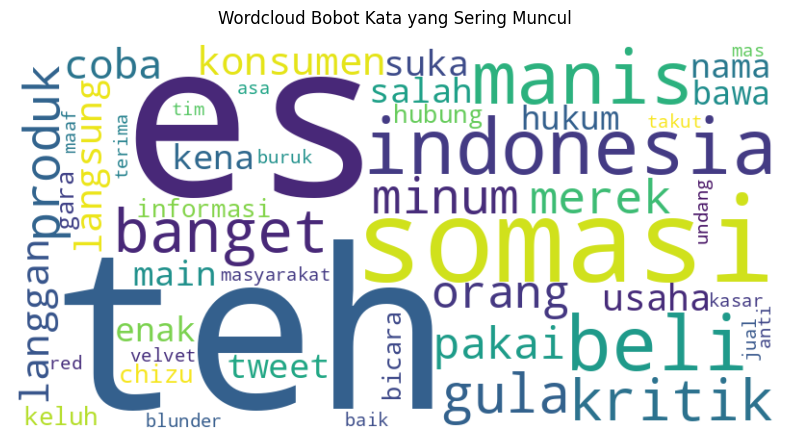

In [ ]:
# Mencari kata yang sering muncul/digunakan
most_frequent_words = tfidf_df.sum().sort_values(ascending=False).head(50)

# Membuat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(most_frequent_words)

# Menampilkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud Bobot Kata yang Sering Muncul', pad=15)
plt.axis("off")
plt.show()

In [ ]:
most_frequent_words

teh           147.327690
es            142.219201
somasi        133.917485
indonesia     103.994977
beli          100.947001
manis          96.405993
banget         88.434904
kritik         80.731756
gula           72.794909
minum          59.208620
produk         59.196721
merek          54.258663
orang          52.311705
pakai          47.576897
coba           42.027872
konsumen       40.737892
langgan        40.089587
langsung       34.608658
usaha          34.507799
suka           31.895967
kena           30.250500
salah          29.642813
tweet          29.523998
main           29.093806
nama           27.928191
enak           27.687551
bawa           26.622936
hukum          26.128778
informasi      24.660642
hubung         24.189250
gara           23.704946
bicara         23.534809
keluh          23.369480
chizu          23.144313
masyarakat     22.864676
red            22.598875
asa            22.506581
velvet         22.249921
terima         22.075137
takut          21.497905


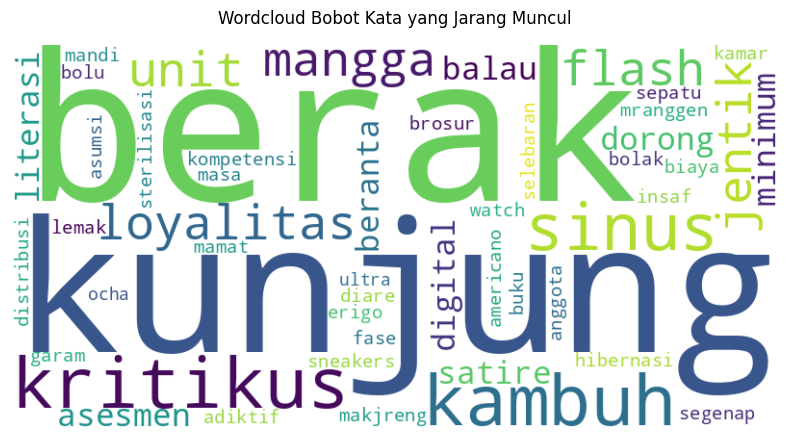

In [ ]:
# Mencari kata yang jarang muncul/digunakan
least_frequent_words = tfidf_df.sum().sort_values(ascending=True).head(50)

# Membuat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(least_frequent_words)

# Menampilkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud Bobot Kata yang Jarang Muncul', pad=15)
plt.axis("off")
plt.show()

In [ ]:
least_frequent_words

ocha           0.187775
ultra          0.193094
lemak          0.227447
selebaran      0.227447
buku           0.227447
brosur         0.227447
garam          0.227447
anggota        0.227447
mandi          0.231596
diare          0.231596
bolak          0.231596
kamar          0.231596
sterilisasi    0.233187
masa           0.233551
asumsi         0.233551
bolu           0.233551
distribusi     0.235752
mamat          0.235752
insaf          0.239235
adiktif        0.239235
americano      0.239235
watch          0.241250
sneakers       0.241250
sepatu         0.241250
erigo          0.246056
mranggen       0.247825
makjreng       0.247825
hibernasi      0.249559
biaya          0.249559
segenap        0.249559
fase           0.249559
asesmen        0.249711
satire         0.249711
literasi       0.249711
minimum        0.249711
beranta        0.249711
kompetensi     0.249711
balau          0.250249
dorong         0.251157
digital        0.251157
mangga         0.251666
flash          0

##**VISUALIZATION & SPLITING DATA**

###Visualization Sentiment

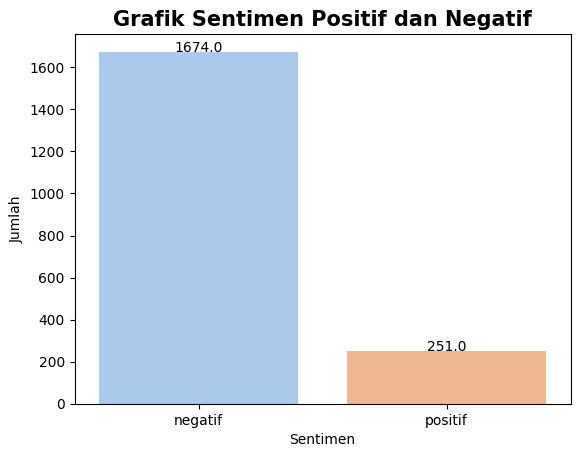

In [ ]:
# Membuat grafik batang
vizualization = sns.countplot(x='Sentiment', data=stemming, palette="pastel")

# Menampilkan jumlah data berdasarkan lebar dan tinggi grafik
for graph in vizualization.patches:
    vizualization.text (graph.get_x() + graph.get_width()  / 2, graph.get_height(), graph.get_height(), horizontalalignment='center', fontsize = 10)

# Menampilkan grafik
plt.title('Grafik Sentimen Positif dan Negatif', fontsize=15, fontweight='bold')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

###Wordcloud Positif

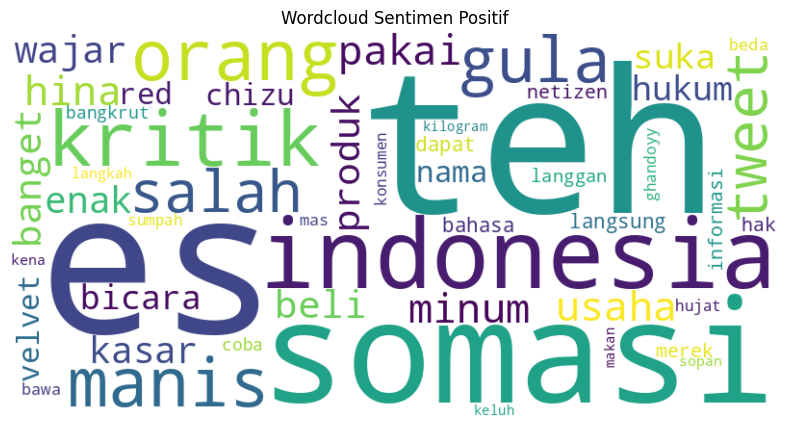

In [ ]:
# Ambil semua kata dari kolom 'stemming' dengan sentimen positif
positive_stemming = ' '.join(stemming[stemming['Sentiment'] == 'positif']['Stemming'])

# Tokenisasi teks
tokens_positive = positive_stemming.split()

# Hitung frekuensi kata
word_counts_positive = Counter(tokens_positive)

# Buat WordCloud
wordcloud_positive = WordCloud(width=800, height=400, max_words=50, background_color='white').generate_from_frequencies(word_counts_positive)

# Menampilkan wordcloud untuk sentimen positif
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Sentimen Positif')
plt.show()

In [ ]:
# Mendapatkan kata-kata dari wordcloud
words_in_wordcloud = wordcloud_positive.words_

# Mengonversi kata-kata menjadi daftar
word_list = list(words_in_wordcloud.keys())

print('Jumlah token : ', len(word_counts_positive))

# Mendapatkan jumlah kemunculan (count) setiap kata dalam wordcloud
word_counts = [word_counts_positive[word] for word in word_list]

# Menampilkan daftar kata-kata beserta jumlah kemunculannya
for word, count in zip(word_list, word_counts):
    print(f'{word}: {count}')

Jumlah token :  778
es: 219
teh: 218
somasi: 147
indonesia: 131
kritik: 76
orang: 63
manis: 59
gula: 53
salah: 43
tweet: 43
pakai: 42
hina: 40
minum: 40
usaha: 40
banget: 36
beli: 36
produk: 36
wajar: 35
enak: 34
kasar: 34
suka: 30
bicara: 28
hukum: 28
nama: 22
chizu: 22
red: 22
velvet: 22
langsung: 22
bahasa: 22
dapat: 22
merek: 20
hak: 20
netizen: 19
informasi: 19
langgan: 18
coba: 17
bangkrut: 17
beda: 16
mas: 16
bawa: 16
hujat: 15
konsumen: 15
sumpah: 15
ghandoyy: 15
langkah: 14
sopan: 14
kena: 14
makan: 13
kilogram: 13
keluh: 13


###Wordcloud Negatif

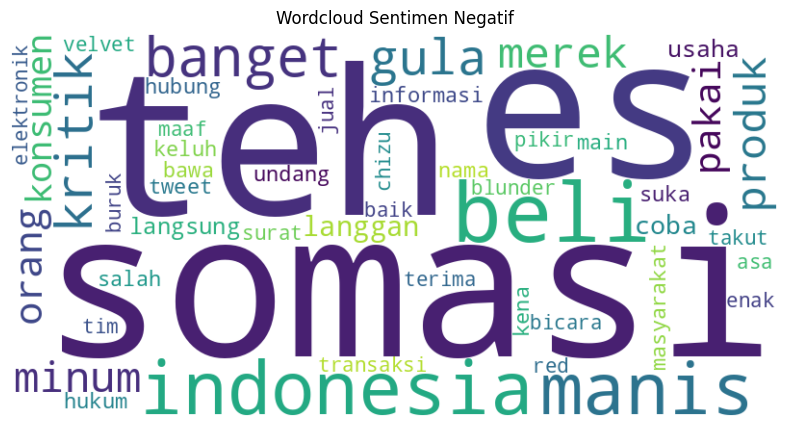

In [ ]:
# Ambil semua kata dari kolom 'stemming' dengan sentimen positif
negative_stemming = ' '.join(stemming[stemming['Sentiment'] == 'negatif']['Stemming'])

# Tokenisasi teks
tokens_negative = negative_stemming.split()

# Hitung frekuensi kata
word_counts_negative = Counter(tokens_negative)

# Buat WordCloud
wordcloud_negative = WordCloud(width=800, height=400, max_words=50, background_color='white').generate_from_frequencies(word_counts_negative)

# Menampilkan wordcloud untuk sentimen positif
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Sentimen Negatif')
plt.show()

In [ ]:
# Mendapatkan kata-kata dari wordcloud
words_in_wordcloud = wordcloud_negative.words_

# Mengonversi kata-kata menjadi daftar
word_list = list(words_in_wordcloud.keys())

print('Jumlah token : ', len(word_counts_negative))

# Mendapatkan jumlah kemunculan (count) setiap kata dalam wordcloud
word_counts = [word_counts_negative[word] for word in word_list]

# Menampilkan daftar kata-kata beserta jumlah kemunculannya
for word, count in zip(word_list, word_counts):
    print(f'{word}: {count}')

Jumlah token :  1835
somasi: 1225
teh: 1219
es: 1151
beli: 560
indonesia: 558
manis: 524
banget: 500
kritik: 417
gula: 403
merek: 304
produk: 304
minum: 297
orang: 250
pakai: 243
konsumen: 203
langgan: 194
coba: 167
usaha: 141
langsung: 135
main: 115
suka: 114
informasi: 113
nama: 108
hubung: 106
hukum: 102
masyarakat: 100
kena: 99
salah: 96
undang: 96
keluh: 93
bawa: 91
tweet: 88
chizu: 82
terima: 82
red: 81
enak: 81
transaksi: 80
elektronik: 80
velvet: 78
buruk: 75
asa: 75
bicara: 74
tim: 71
blunder: 69
jual: 68
maaf: 68
takut: 65
surat: 63
baik: 61
pikir: 60


###Split Data

In [ ]:
X = tfidf_matrix
y = stemming['Sentiment']

# Membagi data train 80% dan test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Ukuran data training : ', X_train.shape, y_train.shape)
print('Ukuran data testing : ', X_test.shape, y_test.shape)

Ukuran data training :  (1540, 1976) (1540,)
Ukuran data testing :  (385, 1976) (385,)


In [ ]:
y_test.value_counts()

negatif    344
positif     41
Name: Sentiment, dtype: int64

In [ ]:
y_train.value_counts()

negatif    1330
positif     210
Name: Sentiment, dtype: int64

In [ ]:
y.value_counts()

negatif    1674
positif     251
Name: Sentiment, dtype: int64

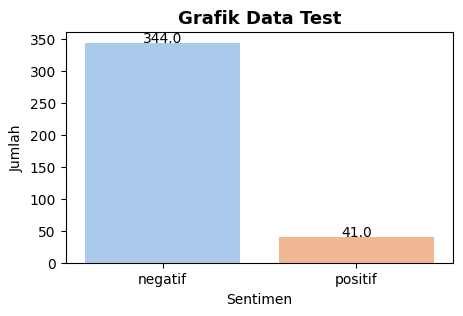

In [ ]:
# Membuat grafik distribusi kelas
plt.figure(figsize=(5, 3))
vizualization = sns.countplot(x=y_test, palette="pastel")

# Menambahkan label (jumlah data) pada grafik batang
for graph in vizualization.patches:
    vizualization.text(graph.get_x() + graph.get_width() / 2, graph.get_height(),
                       graph.get_height(), horizontalalignment='center', fontsize=10)

plt.title('Grafik Data Test', fontsize=13, fontweight='bold')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

##**OVERSAMPLING SMOTE**

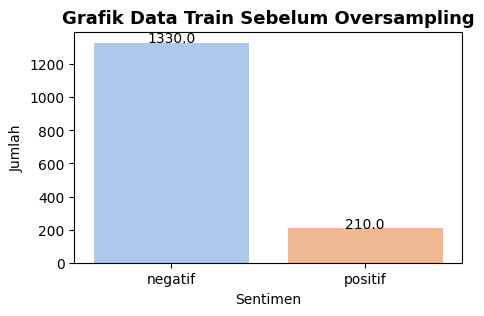

In [ ]:
# Membuat grafik distribusi kelas
plt.figure(figsize=(5, 3))
vizualization = sns.countplot(x=y_train, palette="pastel")

# Menambahkan label pada grafik batang
for graph in vizualization.patches:
    vizualization.text(graph.get_x() + graph.get_width() / 2, graph.get_height(),
                       graph.get_height(), horizontalalignment='center', fontsize=10)

plt.title('Grafik Data Train Sebelum Oversampling', fontsize=13, fontweight='bold')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
# Nilai 'auto' mengatur proporsi jumlah sampel kelas minoritas menjadi setara dengan kelas mayoritas. Bisa diatur ke 0,5 dll
# 42 = Ini adalah nilai seed (bilangan acak) yang digunakan untuk menghasilkan sampel sintetis secara deterministik, yang bermanfaat untuk reproduksibilitas.
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

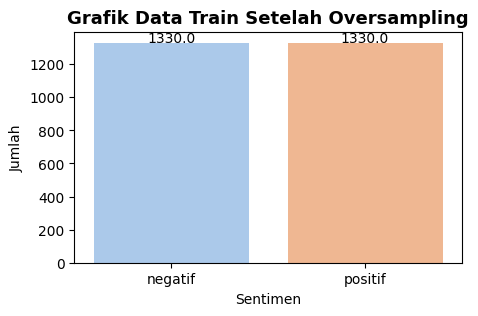

In [ ]:
# Membuat grafik distribusi kelas
plt.figure(figsize=(5, 3))
vizualization = sns.countplot(x=y_train_resampled, palette="pastel")

# Menambahkan label pada grafik batang
for graph in vizualization.patches:
    vizualization.text(graph.get_x() + graph.get_width() / 2, graph.get_height(),
                       graph.get_height(), horizontalalignment='center', fontsize=10)

plt.title('Grafik Data Train Setelah Oversampling', fontsize=13, fontweight='bold')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

##**MODEL NAIVE BAYES**

###**Without Hyperparameter Tuning**

In [ ]:
nb_model_1 = MultinomialNB()

# Latih model menggunakan data latih
nb_model_1.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [ ]:
# Melakukan cross-validation dengan k=10 dan mengukur akurasi
nb_score = cross_val_score(nb_model_1, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy')

# Menghitung rata-rata akurasi dari cross-validation
mean_accuracy = nb_score.mean()
print('Rata-Rata Akurasi : ', mean_accuracy)

nb_score

Rata-Rata Akurasi :  0.9


array([0.87218045, 0.91353383, 0.90977444, 0.89849624, 0.89097744,
       0.89473684, 0.91729323, 0.88721805, 0.91353383, 0.90225564])

In [ ]:
nb_model_1.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}

In [ ]:
y_pred_train = nb_model_1.predict(X_train_resampled)
print('Accuracy Data Training : ', accuracy_score(y_train_resampled, y_pred_train))

Accuracy Data Training :  0.9353383458646617


In [ ]:
# Gunakan model untuk memprediksi akurasi data test
y_pred_test = nb_model_1.predict(X_test)

accuracy_mnb_no_tuning = accuracy_score(y_test, y_pred_test)
print('Akurasi Data Testing : ', accuracy_mnb_no_tuning)
print(classification_report(y_test, y_pred_test, digits=4))

Akurasi Data Testing :  0.8025974025974026
              precision    recall  f1-score   support

     negatif     0.9527    0.8198    0.8813       344
     positif     0.3034    0.6585    0.4154        41

    accuracy                         0.8026       385
   macro avg     0.6280    0.7392    0.6483       385
weighted avg     0.8836    0.8026    0.8316       385



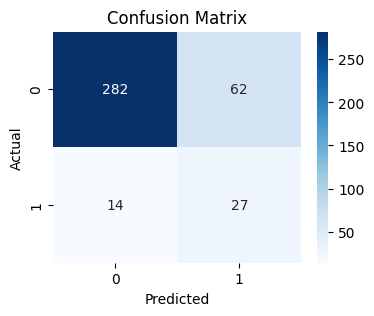

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Membuat confusion matrix berbentuk kotak dengan label TP, TN, FP, FN menggunakan heatmap dari seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]

print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)
print("True Positive (TP):", TP)

True Negative (TN): 282
False Positive (FP): 62
False Negative (FN): 14
True Positive (TP): 27


In [ ]:
# Prediksi probabilitas
y_prob_nb1 = nb_model_1.predict_proba(X_test)

# Menghitung AUC kelas positif dan negatif
auc_score_pos_nb1 = roc_auc_score(y_test, y_prob_nb1[:, 1])

auc_score_neg_nb1 = roc_auc_score(y_test, y_prob_nb1[:, 0])

# Menghitung rata-rata AUC
average_auc = (auc_score_pos_nb1 + auc_score_neg_nb1) / 2

print('AUC kelas positif : ', auc_score_pos_nb1)
print('AUC kelas negatif : ', auc_score_neg_nb1)
print('Rata-Rata : ', average_auc)

AUC kelas positif :  0.8010493477027794
AUC kelas negatif :  0.19895065229722067
Rata-Rata :  0.5


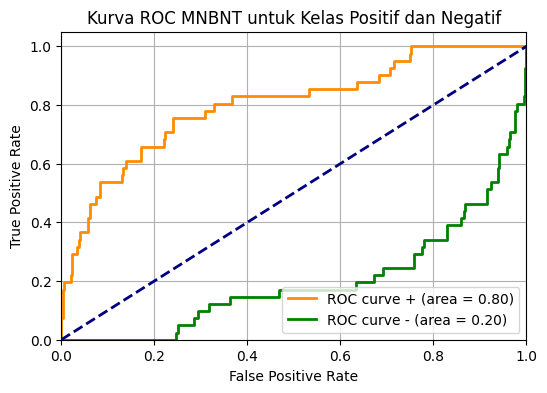

In [ ]:
# konversi label dari string ke int
y_numeric = np.where(y_test == 'positif', 1, 0)

# Menghitung kurva ROC dan AUC untuk kelas positif
fpr_pos_nb1, tpr_pos_nb1, _ = roc_curve(y_numeric, y_prob_nb1[:, 1])
roc_auc_pos_nb1 = auc(fpr_pos_nb1, tpr_pos_nb1)

# Menghitung kurva ROC dan AUC untuk kelas negatif
fpr_neg_nb1, tpr_neg_nb1, _ = roc_curve(y_numeric, y_prob_nb1[:, 0])
roc_auc_neg_nb1 = auc(fpr_neg_nb1, tpr_neg_nb1)

# Menampilkan kurva ROC untuk kelas positif dan negatif
plt.figure(figsize=(6, 4))
plt.plot(fpr_pos_nb1, tpr_pos_nb1, color='darkorange', lw=2, label='ROC curve + (area = %0.2f)' % roc_auc_pos_nb1)
plt.plot(fpr_neg_nb1, tpr_neg_nb1, color='green', lw=2, label='ROC curve - (area = %0.2f)' % roc_auc_neg_nb1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC MNBNT untuk Kelas Positif dan Negatif')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

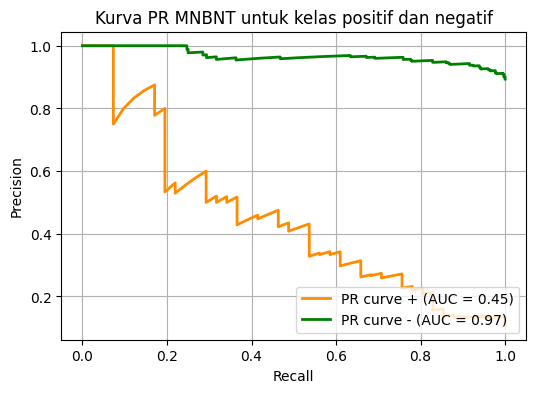

In [ ]:
# Menghitung kurva PR untuk kelas positif
precision_pos_nb1, recall_pos_nb1, _ = precision_recall_curve(y_numeric, y_prob_nb1[:, 1])
pr_auc_pos_nb1 = auc(recall_pos_nb1, precision_pos_nb1)

# Menghitung kurva PR untuk kelas negatif
precision_neg_nb1, recall_neg_nb1, _ = precision_recall_curve(1 - y_numeric, y_prob_nb1[:, 0])
pr_auc_neg_nb1 = auc(recall_neg_nb1, precision_neg_nb1)

plt.figure(figsize=(6, 4))
plt.plot(recall_pos_nb1, precision_pos_nb1, color='darkorange', lw=2, label='PR curve + (AUC = %0.2f)' % pr_auc_pos_nb1)
plt.plot(recall_neg_nb1, precision_neg_nb1, color='green', lw=2, label='PR curve - (AUC = %0.2f)' % pr_auc_neg_nb1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Kurva PR MNBNT untuk kelas positif dan negatif')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(nb_model_1, X_train_resampled, y_train_resampled, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy')

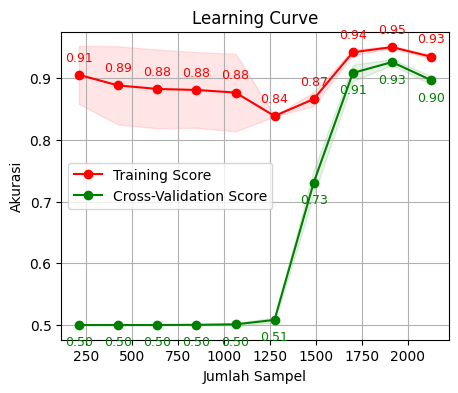

In [ ]:
# Plot learning curve
plt.figure(figsize=(5, 4))
plt.title('Learning Curve')
plt.xlabel('Jumlah Sampel')
plt.ylabel('Akurasi')
plt.grid()

# Ini mengisi wilayah antara nilai rata-rata skor pelatihan/validasi. Ini memberikan gambaran tentang variabilitas skor pelatihan/test
# seiring dengan peningkatan jumlah sampel.
plt.fill_between(train_sizes, train_scores.mean(axis=1) - train_scores.std(axis=1),
                 train_scores.mean(axis=1) + train_scores.std(axis=1), alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores.mean(axis=1) - test_scores.std(axis=1),
                 test_scores.mean(axis=1) + test_scores.std(axis=1), alpha=0.1, color='g')

# Menampilkan skor rata-rata pada plot
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', color='g', label='Cross-Validation Score')

# Loop yang digunakan untuk menambahkan angka yang menunjukkan skor rata-rata pada grafik.
for i, (train_score, test_score) in enumerate(zip(train_scores.mean(axis=1), test_scores.mean(axis=1))):
    plt.annotate(f'{train_score:.2f}', (train_sizes[i], train_score), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='red')
    plt.annotate(f'{test_score:.2f}', (train_sizes[i], test_score), textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color='green')

plt.legend(loc='best')
plt.grid(True)
plt.show()

###**With Hyperparameter Tuning**

In [ ]:
# Inisialisasi model Naive Bayes
nb_model_2 = MultinomialNB()

# Definisikan grid parameter yang akan dituning
param_grid = {
    'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 2.0, 3.0],
    # 'alpha': [0.01, 0.1, 1, 10, 100],
    # True (default) = Model menghitung probabilitas prior dari setiap kelas berdasarkan distribusi empiris dari data latih (model menghitung berapa banyak sampel yang ada dalam setiap kelas)
    # False = mengabaikan distribusi empiris dari data latih dan menggunakan distribusi prior yang sama untuk semua kelas (semua kelas diberi bobot sama)
    'fit_prior': [True, False],
}

# Buat objek GridSearchCV
nb_grid_search = GridSearchCV(nb_model_2, param_grid, cv=10, scoring='accuracy', return_train_score=True)

# Lakukan tuning parameter menggunakan data train
nb_grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 2.0, 3.0],
                         'fit_prior': [True, False]},
             return_train_score=True, scoring='accuracy')

In [ ]:
nb_grid_search.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__alpha': 1.0,
 'estimator__class_prior': None,
 'estimator__fit_prior': True,
 'estimator__force_alpha': 'warn',
 'estimator': MultinomialNB(),
 'n_jobs': None,
 'param_grid': {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 2.0, 3.0],
  'fit_prior': [True, False]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': True,
 'scoring': 'accuracy',
 'verbose': 0}

In [ ]:
# Atribut yang berisi kombinasi terbaik dari nilai hiperparameter yang telah dicari selama proses pencarian
print('Model terbaik : ', nb_grid_search.best_params_)

Model terbaik :  {'alpha': 0.1, 'fit_prior': True}


In [ ]:
# Atribut yang berisi model estimator terbaik yang telah ditemukan selama pencarian hiperparameter yang digunakan untuk testing
best_nb_model = nb_grid_search.best_estimator_

In [ ]:
# Membuat DataFrame dari cv_results_
cv_results_nb = pd.DataFrame(nb_grid_search.cv_results_)

# Menampilkan DataFrame
cv_results_nb[['param_alpha', 'param_fit_prior', 'mean_train_score', 'mean_test_score', 'rank_test_score']]

,param_alpha,param_fit_prior,mean_train_score,mean_test_score,rank_test_score
0,0.1,True,0.958104,0.927444,1
1,0.1,False,0.958104,0.927444,1
2,0.2,True,0.954470,0.922556,3
3,0.2,False,0.954470,0.922556,3
4,0.3,True,0.951128,0.917293,5
5,0.3,False,0.951128,0.917293,5
6,0.4,True,0.947285,0.913158,7
7,0.4,False,0.947285,0.913158,7
8,0.5,True,0.944862,0.909023,9
9,0.5,False,0.944862,0.909023,9


In [ ]:
cv_results_nb.to_csv('Train Result NB Tuning.csv')

In [ ]:
y_pred_train = best_nb_model.predict(X_train_resampled)
print('Accuracy Data Training : ', accuracy_score(y_train_resampled, y_pred_train))

Accuracy Data Training :  0.9575187969924812


In [ ]:
# Gunakan model dengan parameter terbaik untuk prediksi akurasi pada data test
y_pred_test = best_nb_model.predict(X_test)

accuracy_mnb_tuning = accuracy_score(y_test, y_pred_test)
print('Akurasi Data Testing : ', accuracy_mnb_tuning)
print(classification_report(y_test, y_pred_test, digits=4))

Akurasi Data Testing :  0.8545454545454545
              precision    recall  f1-score   support

     negatif     0.9390    0.8953    0.9167       344
     positif     0.3684    0.5122    0.4286        41

    accuracy                         0.8545       385
   macro avg     0.6537    0.7038    0.6726       385
weighted avg     0.8783    0.8545    0.8647       385



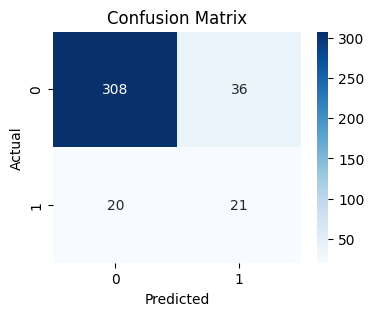

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Membuat confusion matrix berbentuk kotak dengan label TP, TN, FP, FN menggunakan heatmap dari seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]

print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)
print("True Positive (TP):", TP)

True Negative (TN): 308
False Positive (FP): 36
False Negative (FN): 20
True Positive (TP): 21


In [ ]:
# Prediksi probabilitas
y_prob_nb2 = best_nb_model.predict_proba(X_test)

# Menghitung AUC kelas positif dan negatif
auc_score_pos_nb2 = roc_auc_score(y_test, y_prob_nb2[:, 1])

auc_score_neg_nb2 = roc_auc_score(y_test, y_prob_nb2[:, 0])

# Menghitung rata-rata AUC
average_auc_nb2 = (auc_score_pos_nb2 + auc_score_neg_nb2) / 2

print('AUC kelas positif : ', auc_score_pos_nb2)
print('AUC kelas negatif : ', auc_score_neg_nb2)
print('Rata-Rata : ', average_auc_nb2)

AUC kelas positif :  0.7678672716959728
AUC kelas negatif :  0.2321327283040272
Rata-Rata :  0.5


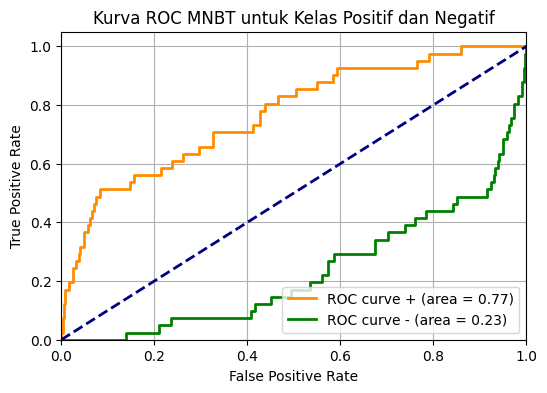

In [ ]:
# konversi label dari string ke int
y_numeric = np.where(y_test == 'positif', 1, 0)

# Menghitung kurva ROC dan AUC untuk kelas positif
fpr_pos_nb2, tpr_pos_nb2, _ = roc_curve(y_numeric, y_prob_nb2[:, 1])
roc_auc_pos_nb2 = auc(fpr_pos_nb2, tpr_pos_nb2)

# Menghitung kurva ROC dan AUC untuk kelas negatif
fpr_neg_nb2, tpr_neg_nb2, _ = roc_curve(y_numeric, y_prob_nb2[:, 0])
roc_auc_neg_nb2 = auc(fpr_neg_nb2, tpr_neg_nb2)

# Menampilkan kurva ROC untuk kelas positif dan negatif
plt.figure(figsize=(6, 4))
plt.plot(fpr_pos_nb2, tpr_pos_nb2, color='darkorange', lw=2, label='ROC curve + (area = %0.2f)' % roc_auc_pos_nb2)
plt.plot(fpr_neg_nb2, tpr_neg_nb2, color='green', lw=2, label='ROC curve - (area = %0.2f)' % roc_auc_neg_nb2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC MNBT untuk Kelas Positif dan Negatif')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

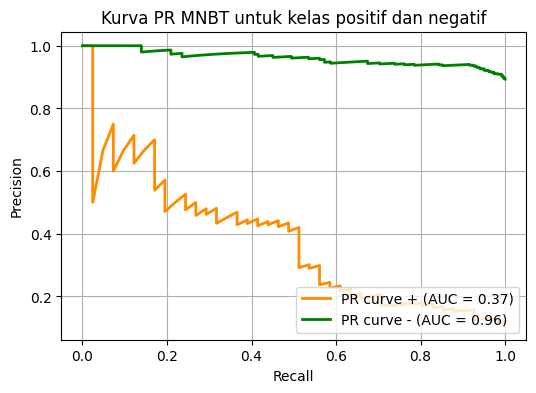

In [ ]:
# Menghitung kurva PR untuk kelas positif
precision_pos_nb2, recall_pos_nb2, _ = precision_recall_curve(y_numeric, y_prob_nb2[:, 1])
pr_auc_pos_nb2 = auc(recall_pos_nb2, precision_pos_nb2)

# Menghitung kurva PR untuk kelas negatif
precision_neg_nb2, recall_neg_nb2, _ = precision_recall_curve(1 - y_numeric, y_prob_nb2[:, 0])
pr_auc_neg_nb2 = auc(recall_neg_nb2, precision_neg_nb2)

plt.figure(figsize=(6, 4))
plt.plot(recall_pos_nb2, precision_pos_nb2, color='darkorange', lw=2, label='PR curve + (AUC = %0.2f)' % pr_auc_pos_nb2)
plt.plot(recall_neg_nb2, precision_neg_nb2, color='green', lw=2, label='PR curve - (AUC = %0.2f)' % pr_auc_neg_nb2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Kurva PR MNBT untuk kelas positif dan negatif')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(best_nb_model, X_train_resampled, y_train_resampled, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy')

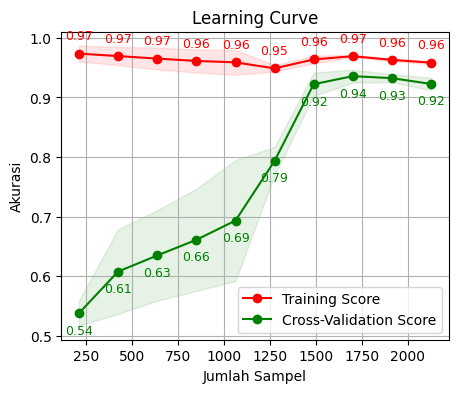

In [ ]:
# Plot learning curve
plt.figure(figsize=(5, 4))
plt.title('Learning Curve')
plt.xlabel('Jumlah Sampel')
plt.ylabel('Akurasi')
plt.grid()

# Ini mengisi wilayah antara nilai rata-rata skor pelatihan/validasi. Ini memberikan gambaran tentang variabilitas skor pelatihan/test
# seiring dengan peningkatan jumlah sampel.
plt.fill_between(train_sizes, train_scores.mean(axis=1) - train_scores.std(axis=1),
                 train_scores.mean(axis=1) + train_scores.std(axis=1), alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores.mean(axis=1) - test_scores.std(axis=1),
                 test_scores.mean(axis=1) + test_scores.std(axis=1), alpha=0.1, color='g')

# Menampilkan skor rata-rata pada plot
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', color='g', label='Cross-Validation Score')

# Loop yang digunakan untuk menambahkan angka yang menunjukkan skor rata-rata pada grafik.
for i, (train_score, test_score) in enumerate(zip(train_scores.mean(axis=1), test_scores.mean(axis=1))):
    plt.annotate(f'{train_score:.2f}', (train_sizes[i], train_score), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='red')
    plt.annotate(f'{test_score:.2f}', (train_sizes[i], test_score), textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color='green')

plt.legend(loc='best')
plt.grid(True)
plt.show()

##**MODEL SUPPORT VECTOR MACHINE**

###**Without Hyperparameter Tuning**

In [ ]:
svm_model_1 = SVC(probability=True)

# Latih model menggunakan data latih
svm_model_1.fit(X_train_resampled, y_train_resampled)

SVC(probability=True)

In [ ]:
# Melakukan cross-validation dengan k=10 dan mengukur akurasi
svm_score = cross_val_score(svm_model_1, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy')

# Menghitung rata-rata akurasi dari cross-validation
mean_accuracy = svm_score.mean()
print('Rata-Rata Akurasi : ', mean_accuracy)

svm_score

Rata-Rata Akurasi :  0.9842105263157894


array([0.90977444, 0.97744361, 1.        , 0.9962406 , 0.9887218 ,
       0.9887218 , 1.        , 0.9924812 , 0.9924812 , 0.9962406 ])

In [ ]:
svm_model_1.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
y_pred_train = svm_model_1.predict(X_train_resampled)
print('Accuracy Data Training : ', accuracy_score(y_train_resampled, y_pred_train))

Accuracy Data Training :  0.9988721804511278


In [ ]:
# Gunakan model dengan parameter terbaik untuk prediksi akurasi pada testing set
y_pred_test = svm_model_1.predict(X_test)

accuracy_svm_no_tuning = accuracy_score(y_test, y_pred_test)
print('Accuracy Data Testing : ', accuracy_svm_no_tuning)
print(classification_report(y_test, y_pred_test, digits=4))

Accuracy Data Testing :  0.9038961038961039
              precision    recall  f1-score   support

     negatif     0.9115    0.9884    0.9484       344
     positif     0.6667    0.1951    0.3019        41

    accuracy                         0.9039       385
   macro avg     0.7891    0.5917    0.6251       385
weighted avg     0.8855    0.9039    0.8795       385



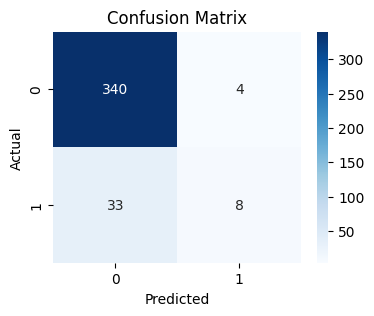

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Membuat confusion matrix berbentuk kotak dengan label TP, TN, FP, FN menggunakan heatmap dari seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]

print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)
print("True Positive (TP):", TP)

True Negative (TN): 340
False Positive (FP): 4
False Negative (FN): 33
True Positive (TP): 8


In [ ]:
# Prediksi probabilitas
y_prob_svm1 = svm_model_1.predict_proba(X_test)

# Menghitung AUC kelas positif dan negatif
auc_score_pos_svm1 = roc_auc_score(y_test, y_prob_svm1[:, 1])

auc_score_neg_svm1 = roc_auc_score(y_test, y_prob_svm1[:, 0])

# Menghitung rata-rata AUC
average_auc_svm1 = (auc_score_pos_svm1 + auc_score_neg_svm1) / 2

print('AUC kelas positif : ', auc_score_pos_svm1)
print('AUC kelas negatif : ', auc_score_neg_svm1)
print('Rata-Rata : ', average_auc_svm1)

AUC kelas positif :  0.8458593306863301
AUC kelas negatif :  0.1541406693136699
Rata-Rata :  0.5


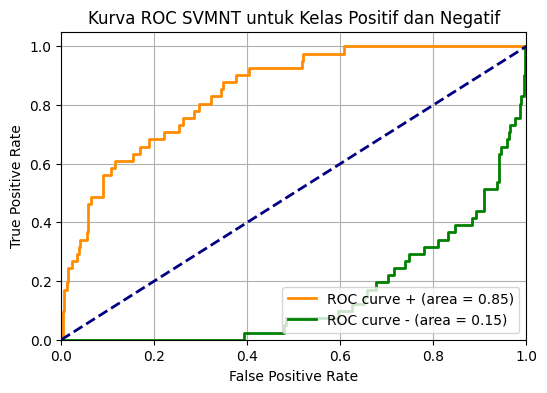

In [ ]:
# konversi label dari string ke int
y_numeric = np.where(y_test == 'positif', 1, 0)

# Menghitung kurva ROC dan AUC untuk kelas positif
fpr_pos_svm1, tpr_pos_svm1, _ = roc_curve(y_numeric, y_prob_svm1[:, 1])
roc_auc_pos_svm1 = auc(fpr_pos_svm1, tpr_pos_svm1)

# Menghitung kurva ROC dan AUC untuk kelas negatif
fpr_neg_svm1, tpr_neg_svm1, _ = roc_curve(y_numeric, y_prob_svm1[:, 0])
roc_auc_neg_svm1 = auc(fpr_neg_svm1, tpr_neg_svm1)

# Menampilkan kurva ROC untuk kelas positif dan negatif
plt.figure(figsize=(6, 4))
plt.plot(fpr_pos_svm1, tpr_pos_svm1, color='darkorange', lw=2, label='ROC curve + (area = %0.2f)' % roc_auc_pos_svm1)
plt.plot(fpr_neg_svm1, tpr_neg_svm1, color='green', lw=2, label='ROC curve - (area = %0.2f)' % roc_auc_neg_svm1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC SVMNT untuk Kelas Positif dan Negatif')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

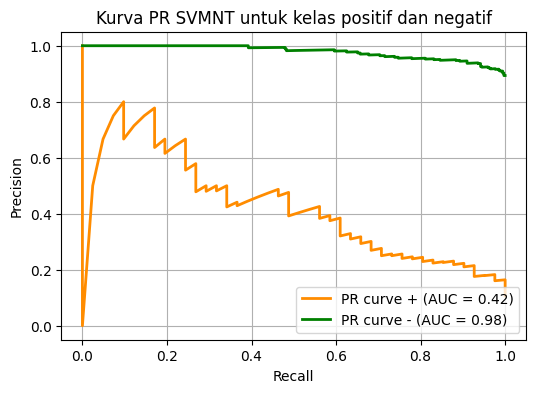

In [ ]:
# Menghitung kurva PR untuk kelas positif
precision_pos_svm1, recall_pos_svm1, _ = precision_recall_curve(y_numeric, y_prob_svm1[:, 1])
pr_auc_pos_svm1 = auc(recall_pos_svm1, precision_pos_svm1)

# Menghitung kurva PR untuk kelas negatif
precision_neg_svm1, recall_neg_svm1, _ = precision_recall_curve(1 - y_numeric, y_prob_svm1[:, 0])
pr_auc_neg_svm1 = auc(recall_neg_svm1, precision_neg_svm1)

plt.figure(figsize=(6, 4))
plt.plot(recall_pos_svm1, precision_pos_svm1, color='darkorange', lw=2, label='PR curve + (AUC = %0.2f)' % pr_auc_pos_svm1)
plt.plot(recall_neg_svm1, precision_neg_svm1, color='green', lw=2, label='PR curve - (AUC = %0.2f)' % pr_auc_neg_svm1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Kurva PR SVMNT untuk kelas positif dan negatif')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(svm_model_1, X_train_resampled, y_train_resampled, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy')

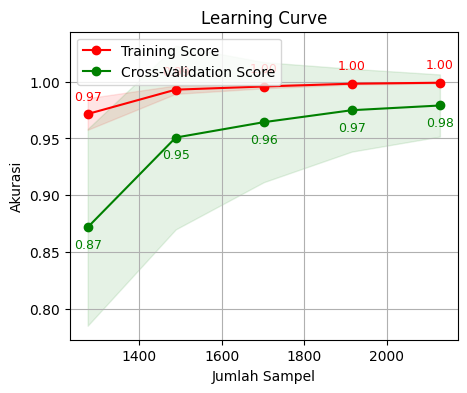

In [ ]:
# Plot learning curve
plt.figure(figsize=(5, 4))
plt.title('Learning Curve')
plt.xlabel('Jumlah Sampel')
plt.ylabel('Akurasi')
plt.grid()

# Ini mengisi wilayah antara nilai rata-rata skor pelatihan/validasi. Ini memberikan gambaran tentang variabilitas skor pelatihan/test
# seiring dengan peningkatan jumlah sampel.
plt.fill_between(train_sizes, train_scores.mean(axis=1) - train_scores.std(axis=1),
                 train_scores.mean(axis=1) + train_scores.std(axis=1), alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores.mean(axis=1) - test_scores.std(axis=1),
                 test_scores.mean(axis=1) + test_scores.std(axis=1), alpha=0.1, color='g')

# Menampilkan skor rata-rata pada plot
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', color='g', label='Cross-Validation Score')


# Loop yang digunakan untuk menambahkan angka yang menunjukkan skor rata-rata pada grafik.
for i, (train_score, test_score) in enumerate(zip(train_scores.mean(axis=1), test_scores.mean(axis=1))):
    plt.annotate(f'{train_score:.2f}', (train_sizes[i], train_score), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='red')
    plt.annotate(f'{test_score:.2f}', (train_sizes[i], test_score), textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color='green')

plt.grid(True)
plt.legend(loc='best')
plt.show()

###**With Hyperparameter Tuning**

In [ ]:
# Inisialisasi model SVM
svm_model_2 = SVC(probability=True)

# Definisikan grid parameter yang akan di-tune
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 'scale'],
}

# Grid Search untuk mencari kombinasi parameter terbaik
svm_grid_search = GridSearchCV(svm_model_2, param_grid, cv=10, scoring='accuracy', n_jobs=-1, return_train_score=True)
svm_grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=10, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 'scale'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             return_train_score=True, scoring='accuracy')

In [ ]:
svm_grid_search.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': True,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(probability=True),
 'n_jobs': -1,
 'param_grid': {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
  'C': [0.001, 0.01, 0.1, 1, 10, 100],
  'gamma': [0.001, 0.01, 0.1, 1, 10, 'scale']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': True,
 'scoring': 'accuracy',
 'verbose': 0}

In [ ]:
# Atribut yang berisi kombinasi terbaik dari nilai hiperparameter yang telah dicari selama proses pencarian
print('Model terbaik : ', svm_grid_search.best_params_)

Model terbaik :  {'C': 0.001, 'gamma': 10, 'kernel': 'poly'}


In [ ]:
# Atribut yang berisi model estimator terbaik yang telah ditemukan selama pencarian hiperparameter yang digunakan untuk testing
best_svm_model = svm_grid_search.best_estimator_

In [ ]:
print('Model terbaik : ', best_svm_model)

Model terbaik :  SVC(C=0.001, gamma=10, kernel='poly', probability=True)


In [ ]:
# Membuat DataFrame dari cv_results_
cv_results_svm = pd.DataFrame(svm_grid_search.cv_results_)

cv_results_svm[['param_kernel', 'param_C', 'mean_train_score', 'mean_test_score', 'rank_test_score']]

,param_kernel,param_C,mean_train_score,mean_test_score,rank_test_score
0,linear,0.001,0.679282,0.672932,95
1,rbf,0.001,0.679950,0.673308,88
2,poly,0.001,0.653592,0.632707,120
3,sigmoid,0.001,0.679282,0.672932,95
4,linear,0.001,0.679282,0.672932,95
...,...,...,...,...,...
139,sigmoid,100,0.621429,0.630075,141
140,linear,100,1.000000,0.954135,21
141,rbf,100,1.000000,0.982707,14
142,poly,100,1.000000,0.988346,4


In [ ]:
cv_results_svm.to_csv('train result SVM tuning.csv')

In [ ]:
y_pred_train = best_svm_model.predict(X_train_resampled)
print('Accuracy Data Training : ', accuracy_score(y_train_resampled, y_pred_train))

Accuracy Data Training :  0.999624060150376


In [ ]:
# Gunakan model dengan parameter terbaik untuk prediksi akurasi pada testing set
y_pred_test = best_svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_test)

print('Accuracy Data Testing : ', accuracy_svm)
print(classification_report(y_test, y_pred_test, digits=4))

Accuracy Data Testing :  0.9038961038961039
              precision    recall  f1-score   support

     negatif     0.9072    0.9942    0.9487       344
     positif     0.7500    0.1463    0.2449        41

    accuracy                         0.9039       385
   macro avg     0.8286    0.5703    0.5968       385
weighted avg     0.8904    0.9039    0.8737       385



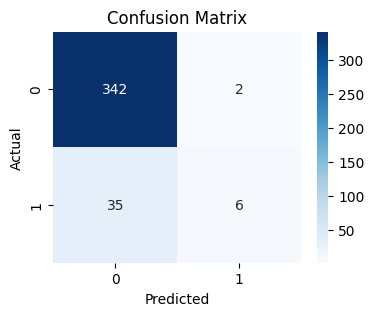

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

# # Membuat confusion matrix berbentuk kotak dengan label TP, TN, FP, FN menggunakan heatmap dari seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]

print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)
print("True Positive (TP):", TP)

True Negative (TN): 342
False Positive (FP): 2
False Negative (FN): 35
True Positive (TP): 6


In [ ]:
# Prediksi probabilitas
y_prob_svm2 = best_svm_model.predict_proba(X_test)

# Menghitung AUC kelas positif dan negatif
auc_score_pos_svm2 = roc_auc_score(y_test, y_prob_svm2[:, 1])

auc_score_neg_svm2 = roc_auc_score(y_test, y_prob_svm2[:, 0])

# Menghitung rata-rata AUC
average_auc_svm2 = (auc_score_pos_svm2 + auc_score_neg_svm2) / 2

print('AUC kelas positif : ', auc_score_pos_svm2)
print('AUC kelas negatif : ', auc_score_neg_svm2)
print('Rata-Rata : ', average_auc_svm2)

AUC kelas positif :  0.7872943845717527
AUC kelas negatif :  0.21270561542824734
Rata-Rata :  0.5


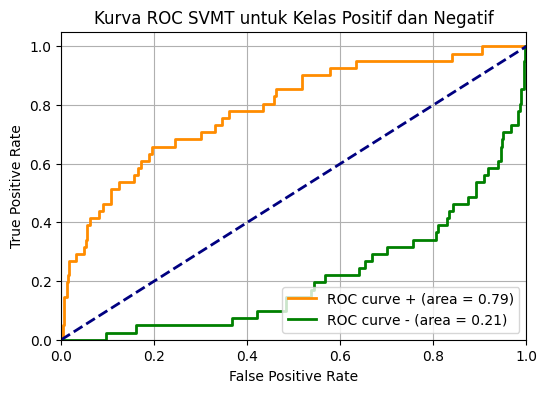

In [ ]:
# konversi label dari string ke int
y_numeric = np.where(y_test == 'positif', 1, 0)

# Menghitung kurva ROC dan AUC untuk kelas positif
fpr_pos_svm2, tpr_pos_svm2, _ = roc_curve(y_numeric, y_prob_svm2[:, 1])
roc_auc_pos_svm2 = auc(fpr_pos_svm2, tpr_pos_svm2)

# Menghitung kurva ROC dan AUC untuk kelas negatif
fpr_neg_svm2, tpr_neg_svm2, _ = roc_curve(y_numeric, y_prob_svm2[:, 0])
roc_auc_neg_svm2 = auc(fpr_neg_svm2, tpr_neg_svm2)

# Menampilkan kurva ROC untuk kelas positif dan negatif
plt.figure(figsize=(6, 4))
plt.plot(fpr_pos_svm2, tpr_pos_svm2, color='darkorange', lw=2, label='ROC curve + (area = %0.2f)' % roc_auc_pos_svm2)
plt.plot(fpr_neg_svm2, tpr_neg_svm2, color='green', lw=2, label='ROC curve - (area = %0.2f)' % roc_auc_neg_svm2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC SVMT untuk Kelas Positif dan Negatif')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

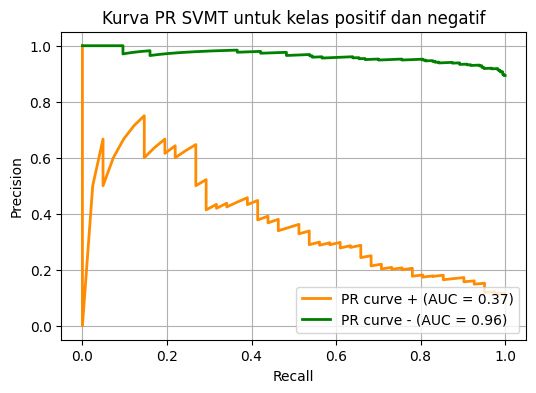

In [ ]:
# Menghitung kurva PR untuk kelas positif
precision_pos_svm2, recall_pos_svm2, _ = precision_recall_curve(y_numeric, y_prob_svm2[:, 1])
pr_auc_pos_svm2 = auc(recall_pos_svm2, precision_pos_svm2)

# Menghitung kurva PR untuk kelas negatif
precision_neg_svm2, recall_neg_svm2, _ = precision_recall_curve(1 - y_numeric, y_prob_svm2[:, 0])
pr_auc_neg_svm2 = auc(recall_neg_svm2, precision_neg_svm2)

plt.figure(figsize=(6, 4))
plt.plot(recall_pos_svm2, precision_pos_svm2, color='darkorange', lw=2, label='PR curve + (AUC = %0.2f)' % pr_auc_pos_svm2)
plt.plot(recall_neg_svm2, precision_neg_svm2, color='green', lw=2, label='PR curve - (AUC = %0.2f)' % pr_auc_neg_svm2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Kurva PR SVMT untuk kelas positif dan negatif')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(best_svm_model, X_train_resampled, y_train_resampled, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy')

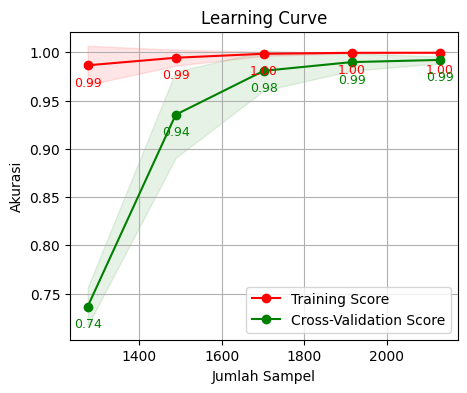

In [ ]:
# Plot learning curve
plt.figure(figsize=(5, 4))
plt.title('Learning Curve')
plt.xlabel('Jumlah Sampel')
plt.ylabel('Akurasi')
plt.grid()

# Ini mengisi wilayah antara nilai rata-rata skor pelatihan/validasi. Ini memberikan gambaran tentang variabilitas skor pelatihan/test
# seiring dengan peningkatan jumlah sampel.
plt.fill_between(train_sizes, train_scores.mean(axis=1) - train_scores.std(axis=1),
                 train_scores.mean(axis=1) + train_scores.std(axis=1), alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores.mean(axis=1) - test_scores.std(axis=1),
                 test_scores.mean(axis=1) + test_scores.std(axis=1), alpha=0.1, color='g')

# Menampilkan skor rata-rata pada plot
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', color='g', label='Cross-Validation Score')


# Loop yang digunakan untuk menambahkan angka yang menunjukkan skor rata-rata pada grafik.
for i, (train_score, test_score) in enumerate(zip(train_scores.mean(axis=1), test_scores.mean(axis=1))):
    plt.annotate(f'{train_score:.2f}', (train_sizes[i], train_score), textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color='red')
    plt.annotate(f'{test_score:.2f}', (train_sizes[i], test_score), textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color='green')

plt.legend(loc='best')
plt.grid(True)
plt.show()

## Curve

### ROC-AUC Curve

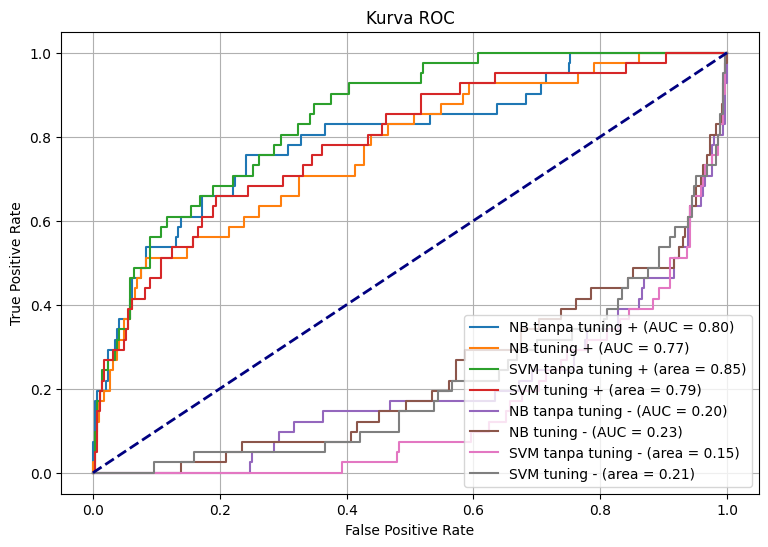

In [ ]:
# Gambar kurva ROC untuk kedua model
plt.figure(figsize=(9, 6))
plt.plot(fpr_pos_nb1, tpr_pos_nb1, label='NB tanpa tuning + (AUC = %0.2f)' % roc_auc_pos_nb1)
plt.plot(fpr_pos_nb2, tpr_pos_nb2, label='NB tuning + (AUC = %0.2f)' % roc_auc_pos_nb2)
plt.plot(fpr_pos_svm1, tpr_pos_svm1, label='SVM tanpa tuning + (area = %0.2f)' % roc_auc_pos_svm1)
plt.plot(fpr_pos_svm2, tpr_pos_svm2, label='SVM tuning + (area = %0.2f)' % roc_auc_pos_svm2)
plt.plot(fpr_neg_nb1, tpr_neg_nb1, label='NB tanpa tuning - (AUC = %0.2f)' % roc_auc_neg_nb1)
plt.plot(fpr_neg_nb2, tpr_neg_nb2, label='NB tuning - (AUC = %0.2f)' % roc_auc_neg_nb2)
plt.plot(fpr_neg_svm1, tpr_neg_svm1, label='SVM tanpa tuning - (area = %0.2f)' % roc_auc_neg_svm1)
plt.plot(fpr_neg_svm2, tpr_neg_svm2, label='SVM tuning - (area = %0.2f)' % roc_auc_neg_svm2)

plt.title('Kurva ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

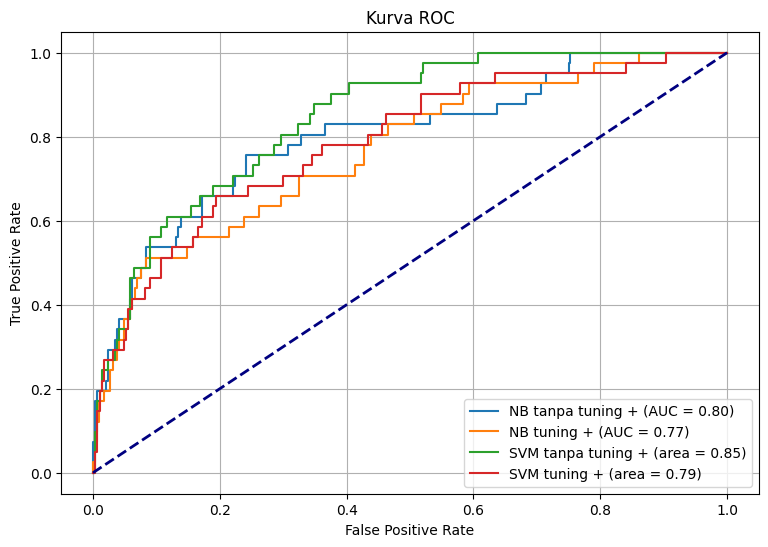

In [ ]:
# Gambar kurva ROC untuk kedua model
plt.figure(figsize=(9, 6))
plt.plot(fpr_pos_nb1, tpr_pos_nb1, label='NB tanpa tuning + (AUC = %0.2f)' % roc_auc_pos_nb1)
plt.plot(fpr_pos_nb2, tpr_pos_nb2, label='NB tuning + (AUC = %0.2f)' % roc_auc_pos_nb2)
plt.plot(fpr_pos_svm1, tpr_pos_svm1, label='SVM tanpa tuning + (area = %0.2f)' % roc_auc_pos_svm1)
plt.plot(fpr_pos_svm2, tpr_pos_svm2, label='SVM tuning + (area = %0.2f)' % roc_auc_pos_svm2)

plt.title('Kurva ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

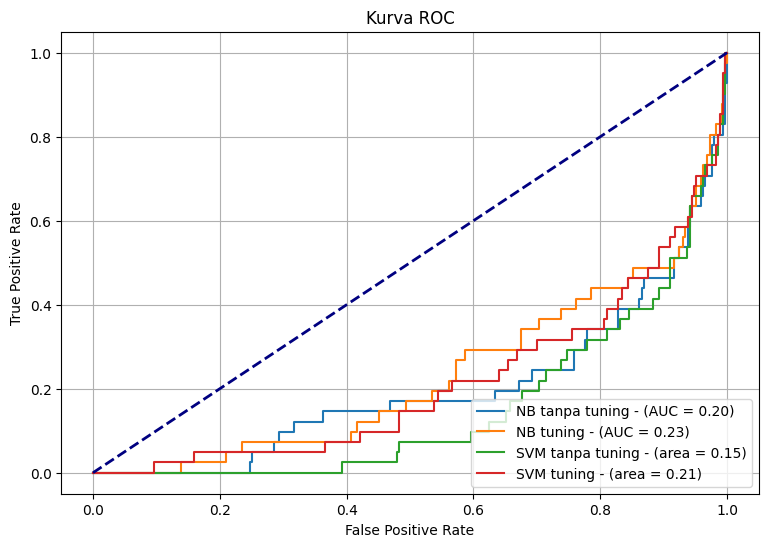

In [ ]:
# Gambar kurva ROC untuk kedua model
plt.figure(figsize=(9, 6))
plt.plot(fpr_neg_nb1, tpr_neg_nb1, label='NB tanpa tuning - (AUC = %0.2f)' % roc_auc_neg_nb1)
plt.plot(fpr_neg_nb2, tpr_neg_nb2, label='NB tuning - (AUC = %0.2f)' % roc_auc_neg_nb2)
plt.plot(fpr_neg_svm1, tpr_neg_svm1, label='SVM tanpa tuning - (area = %0.2f)' % roc_auc_neg_svm1)
plt.plot(fpr_neg_svm2, tpr_neg_svm2, label='SVM tuning - (area = %0.2f)' % roc_auc_neg_svm2)

plt.title('Kurva ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### ROC-PR Curve

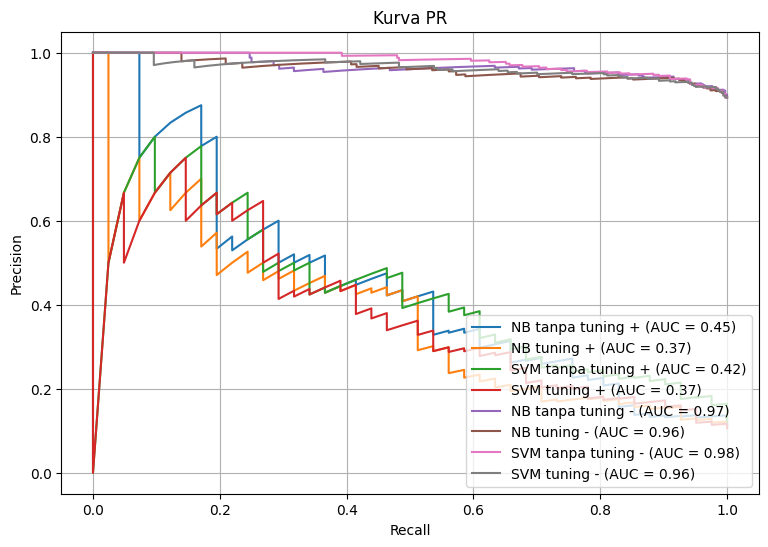

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(recall_pos_nb1, precision_pos_nb1, label='NB tanpa tuning + (AUC = %0.2f)' % pr_auc_pos_nb1)
plt.plot(recall_pos_nb2, precision_pos_nb2, label='NB tuning + (AUC = %0.2f)' % pr_auc_pos_nb2)
plt.plot(recall_pos_svm1, precision_pos_svm1, label='SVM tanpa tuning + (AUC = %0.2f)' % pr_auc_pos_svm1)
plt.plot(recall_pos_svm2, precision_pos_svm2, label='SVM tuning + (AUC = %0.2f)' % pr_auc_pos_svm2)
plt.plot(recall_neg_nb1, precision_neg_nb1, label='NB tanpa tuning - (AUC = %0.2f)' % pr_auc_neg_nb1)
plt.plot(recall_neg_nb2, precision_neg_nb2, label='NB tuning - (AUC = %0.2f)' % pr_auc_neg_nb2)
plt.plot(recall_neg_svm1, precision_neg_svm1, label='SVM tanpa tuning - (AUC = %0.2f)' % pr_auc_neg_svm1)
plt.plot(recall_neg_svm2, precision_neg_svm2, label='SVM tuning - (AUC = %0.2f)' % pr_auc_neg_svm2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Kurva PR')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

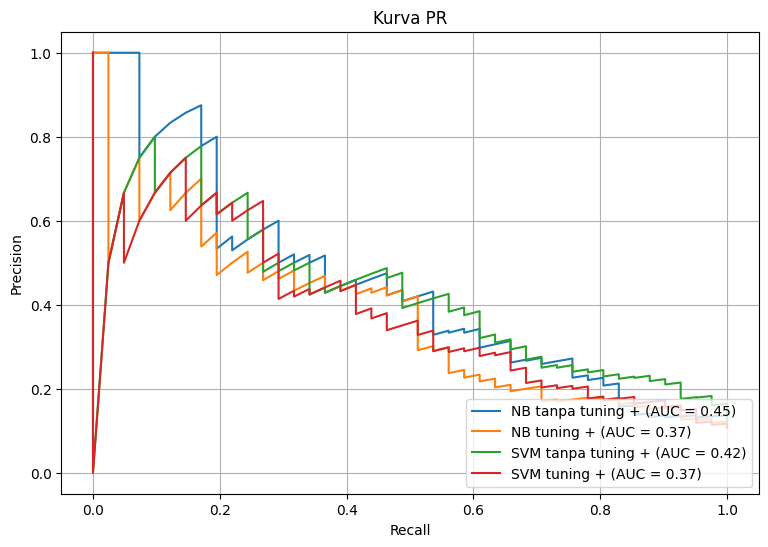

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(recall_pos_nb1, precision_pos_nb1, label='NB tanpa tuning + (AUC = %0.2f)' % pr_auc_pos_nb1)
plt.plot(recall_pos_nb2, precision_pos_nb2, label='NB tuning + (AUC = %0.2f)' % pr_auc_pos_nb2)
plt.plot(recall_pos_svm1, precision_pos_svm1, label='SVM tanpa tuning + (AUC = %0.2f)' % pr_auc_pos_svm1)
plt.plot(recall_pos_svm2, precision_pos_svm2, label='SVM tuning + (AUC = %0.2f)' % pr_auc_pos_svm2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Kurva PR')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

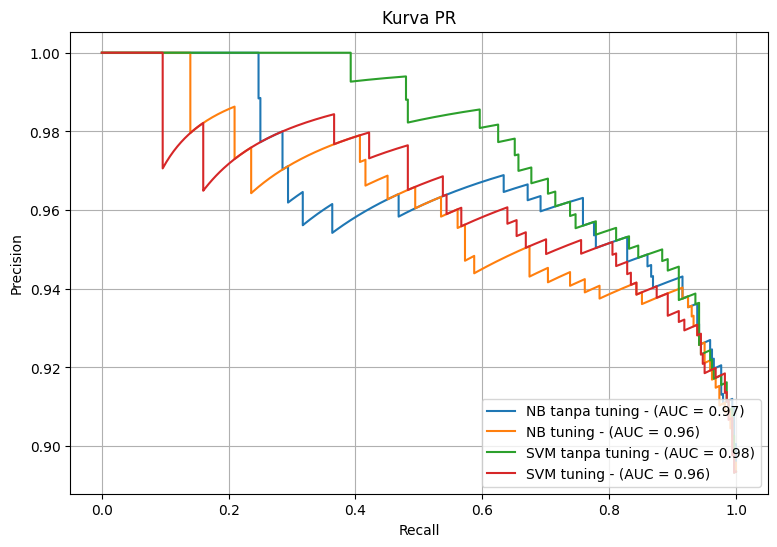

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(recall_neg_nb1, precision_neg_nb1, label='NB tanpa tuning - (AUC = %0.2f)' % pr_auc_neg_nb1)
plt.plot(recall_neg_nb2, precision_neg_nb2, label='NB tuning - (AUC = %0.2f)' % pr_auc_neg_nb2)
plt.plot(recall_neg_svm1, precision_neg_svm1, label='SVM tanpa tuning - (AUC = %0.2f)' % pr_auc_neg_svm1)
plt.plot(recall_neg_svm2, precision_neg_svm2, label='SVM tuning - (AUC = %0.2f)' % pr_auc_neg_svm2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Kurva PR')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

##**KESIMPULAN**

Support Vector Machine
tanpa hyperparameter tuning memiliki performa yang lebih baik dibandingkan
algoritma Naïve Bayes, dengan akurasi 90,39%, presisi 78,91%, recall 59,17%, f1-
score 62,51%, AUC-ROC 0,85, dan AUC-PR 0,42